In [1]:
import numpy as np
from numpy import random
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

### Importing data from csv files 

In [2]:
data1=pd.read_csv('Property_Price_Train.csv') # train data
data2=pd.read_csv('Property_Price_Test.csv') # test data

In [3]:
data1.shape, data2.shape

((1459, 81), (1459, 80))

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

# Cleaning the data

In [5]:
# For checking percentage of null value
def check_null_percentage(data):
    missing_info = pd.DataFrame(np.array(data1.isnull().sum().sort_values(ascending=False).reset_index())\
                                ,columns=['Columns','Missing_Percentage']).query("Missing_Percentage > 0").set_index('Columns')
    return 100*missing_info/data1.shape[0]

In [6]:
check_null_percentage(data1)

Missing_Percentage
Columns                                 
Pool_Quality                   99.520219
Miscellaneous_Feature          96.298835
Lane_Type                      93.762851
Fence_Quality                  80.740233
Fireplace_Quality              47.224126
Lot_Extent                     17.751885
Garage_Built_Year               5.551748
Garage_Condition                5.551748
Garage                          5.551748
Garage_Finish_Year              5.551748
Garage_Quality                  5.551748
BsmtFinType2                    2.604524
Exposure_Level                  2.604524
Basement_Height                 2.535984
Basement_Condition              2.535984
BsmtFinType1                    2.535984
Brick_Veneer_Area               0.548321
Brick_Veneer_Type               0.548321
Electrical_System                0.06854

In [7]:
check_null_percentage(data2)

Missing_Percentage
Columns                                 
Pool_Quality                   99.520219
Miscellaneous_Feature          96.298835
Lane_Type                      93.762851
Fence_Quality                  80.740233
Fireplace_Quality              47.224126
Lot_Extent                     17.751885
Garage_Built_Year               5.551748
Garage_Condition                5.551748
Garage                          5.551748
Garage_Finish_Year              5.551748
Garage_Quality                  5.551748
BsmtFinType2                    2.604524
Exposure_Level                  2.604524
Basement_Height                 2.535984
Basement_Condition              2.535984
BsmtFinType1                    2.535984
Brick_Veneer_Area               0.548321
Brick_Veneer_Type               0.548321
Electrical_System                0.06854

In [8]:
# Droping ID column beacuse its a unique column
# Having null values more then 50%
data1=data1.drop(['Id','Garage_Built_Year','Lane_Type','Pool_Quality','Fence_Quality','Fence_Quality','Miscellaneous_Feature','Fireplace_Quality'],axis=1)

test_2=data2.drop(['Id','Garage_Built_Year','Lane_Type','Pool_Quality','Fence_Quality','Fence_Quality','Miscellaneous_Feature','Fireplace_Quality'],axis=1)

In [9]:
#data1.shape, test_2.shape

### Divide data into 2 parts catagorical and numerical

In [10]:
num=data1.columns[data1.dtypes!='object']
cat=data1.columns[data1.dtypes=='object']
data1[num].isnull().sum()

Building_Class                 0
Lot_Extent                   259
Lot_Size                       0
Overall_Material               0
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Brick_Veneer_Area              8
BsmtFinSF1                     0
BsmtFinSF2                     0
BsmtUnfSF                      0
Total_Basement_Area            0
First_Floor_Area               0
Second_Floor_Area              0
LowQualFinSF                   0
Grade_Living_Area              0
Underground_Full_Bathroom      0
Underground_Half_Bathroom      0
Full_Bathroom_Above_Grade      0
Half_Bathroom_Above_Grade      0
Bedroom_Above_Grade            0
Kitchen_Above_Grade            0
Rooms_Above_Grade              0
Fireplaces                     0
Garage_Size                    0
Garage_Area                    0
W_Deck_Area                    0
Open_Lobby_Area                0
Enclosed_Lobby_Area            0
Three_Season_Lobby_Area        0
Screen_Lob

In [11]:
data1[cat].isnull().sum()

Zoning_Class           0
Road_Type              0
Property_Shape         0
Land_Outline           0
Utility_Type           0
Lot_Configuration      0
Property_Slope         0
Neighborhood           0
Condition1             0
Condition2             0
House_Type             0
House_Design           0
Roof_Design            0
Roof_Quality           0
Exterior1st            0
Exterior2nd            0
Brick_Veneer_Type      8
Exterior_Material      0
Exterior_Condition     0
Foundation_Type        0
Basement_Height       37
Basement_Condition    37
Exposure_Level        38
BsmtFinType1          37
BsmtFinType2          38
Heating_Type           0
Heating_Quality        0
Air_Conditioning       0
Electrical_System      1
Kitchen_Quality        0
Functional_Rate        0
Garage                81
Garage_Finish_Year    81
Garage_Quality        81
Garage_Condition      81
Pavedd_Drive           0
Sale_Type              0
Sale_Condition         0
dtype: int64

## Missing value treatement
#### Checked value_counts for catagoriical data

In [12]:
#data1.Brick_Veneer_Type.value_counts()

In [13]:
#data1.Basement_Height.value_counts()

In [14]:
#data1.Basement_Condition.value_counts()

In [15]:
#data1.Exposure_Level.value_counts()

In [16]:
#data1.BsmtFinType1.value_counts()

In [17]:
#data1.BsmtFinType2.value_counts()

In [18]:
#data1.Electrical_System.value_counts()

In [19]:
#data1.Garage.value_counts()

In [20]:
#data1.Garage_Finish_Year.value_counts()

In [21]:
#data1.Garage_Quality.value_counts()

In [22]:
#data1.Garage_Condition.value_counts()

In [23]:
data1.Lot_Extent=data1.Lot_Extent.fillna(data1.Lot_Extent.median())
data1.Brick_Veneer_Area=data1.Brick_Veneer_Area.fillna(data1.Brick_Veneer_Area.median())
data1.Brick_Veneer_Type=data1.Brick_Veneer_Type.fillna('BrkCmn')
data1.Basement_Height=data1.Basement_Height.fillna('Fa')
data1.Basement_Condition=data1.Basement_Condition.fillna('Po')
data1.Exposure_Level=data1.Exposure_Level.fillna('Mn')
data1.BsmtFinType1=data1.BsmtFinType1.fillna('LwQ')
data1.BsmtFinType2=data1.BsmtFinType2.fillna('GLQ')
data1.Electrical_System=data1.Electrical_System.fillna('Mix')
data1.Garage=data1.Garage.fillna('2Types')
data1.Garage_Finish_Year=data1.Garage_Finish_Year.fillna('Fin')
data1.Garage_Quality=data1.Garage_Quality.fillna('Po')
data1.Garage_Condition=data1.Garage_Condition.fillna('Ex')

In [24]:
#cat=data1.columns[data1.dtypes=='object']
#data1[cat].isnull().sum()

### Conversion of catagrical data into numerical data using LabelEncoder

In [25]:
data1[cat].dtypes

Zoning_Class          object
Road_Type             object
Property_Shape        object
Land_Outline          object
Utility_Type          object
Lot_Configuration     object
Property_Slope        object
Neighborhood          object
Condition1            object
Condition2            object
House_Type            object
House_Design          object
Roof_Design           object
Roof_Quality          object
Exterior1st           object
Exterior2nd           object
Brick_Veneer_Type     object
Exterior_Material     object
Exterior_Condition    object
Foundation_Type       object
Basement_Height       object
Basement_Condition    object
Exposure_Level        object
BsmtFinType1          object
BsmtFinType2          object
Heating_Type          object
Heating_Quality       object
Air_Conditioning      object
Electrical_System     object
Kitchen_Quality       object
Functional_Rate       object
Garage                object
Garage_Finish_Year    object
Garage_Quality        object
Garage_Conditi

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
data1.Zoning_Class = le.fit_transform(data1.Zoning_Class)
data1.Property_Shape =le.fit_transform(data1.Property_Shape)
data1.Road_Type =le.fit_transform(data1.Road_Type)
data1.Land_Outline =le.fit_transform(data1.Land_Outline)
data1.Utility_Type =le.fit_transform(data1.Utility_Type)
data1.Lot_Configuration =le.fit_transform(data1.Lot_Configuration)
data1.Property_Slope =le.fit_transform(data1.Property_Slope)
data1.Neighborhood =le.fit_transform(data1.Neighborhood)
data1.Condition1 =le.fit_transform(data1.Condition1)
data1.Condition2 =le.fit_transform(data1.Condition2)
data1.House_Type =le.fit_transform(data1.House_Type)
data1.House_Design =le.fit_transform(data1.House_Design)
data1.Roof_Design =le.fit_transform(data1.Roof_Design)
data1.Roof_Quality =le.fit_transform(data1.Roof_Quality)
data1.Exterior1st =le.fit_transform(data1.Exterior1st)
data1.Exterior2nd =le.fit_transform(data1.Exterior2nd)
data1.Heating_Quality = le.fit_transform(data1.Heating_Quality)
data1.Brick_Veneer_Type =le.fit_transform(data1.Brick_Veneer_Type)
data1.Exterior_Material =le.fit_transform(data1.Exterior_Material)
data1.Exterior_Condition =le.fit_transform(data1.Exterior_Condition)
data1.Foundation_Type =le.fit_transform(data1.Foundation_Type)
data1.Basement_Height =le.fit_transform(data1.Basement_Height)
data1.Basement_Condition =le.fit_transform(data1.Basement_Condition)
data1.Exposure_Level =le.fit_transform(data1.Exposure_Level)
data1.BsmtFinType1 =le.fit_transform(data1.BsmtFinType1)
data1.BsmtFinType2 =le.fit_transform(data1.BsmtFinType2)
data1.Heating_Type =le.fit_transform(data1.Heating_Type)
data1.Heating_Quality = le.fit_transform(data1.Heating_Quality)
data1.Air_Conditioning = le.fit_transform(data1.Air_Conditioning)
data1.Electrical_System = le.fit_transform(data1.Electrical_System)
data1.Kitchen_Quality = le.fit_transform(data1.Kitchen_Quality)
data1.Functional_Rate = le.fit_transform(data1.Functional_Rate)
data1.Garage = le.fit_transform(data1.Garage)
data1.Garage_Finish_Year = le.fit_transform(data1.Garage_Finish_Year)
data1.Garage_Quality = le.fit_transform(data1.Garage_Quality)
data1.Garage_Condition = le.fit_transform(data1.Garage_Condition)
data1.Pavedd_Drive = le.fit_transform(data1.Pavedd_Drive)
data1.Sale_Type = le.fit_transform(data1.Sale_Type)
data1.Sale_Condition = le.fit_transform(data1.Sale_Condition)

In [28]:
#data1.dtypes

In [29]:
#test_2.info()

In [30]:
# cat to num by using LabelEncoder also fill missing values
test_2 =test_2.apply(le.fit_transform)

In [31]:
#data1.shape

In [32]:
# Droping Duplicate values
data1.drop_duplicates(inplace=True)

In [33]:
#data1.shape

# EDA

In [34]:
data_1=data1.corr() # correlation 
data_1

Building_Class  Zoning_Class  Lot_Extent  Lot_Size  Road_Type  \
Building_Class        1.000000      0.035882   -0.356678 -0.139852  -0.024937   
Zoning_Class          0.035882      1.000000   -0.105955 -0.034453   0.087656   
Lot_Extent           -0.356678     -0.105955    1.000000  0.304537  -0.037360   
Lot_Size             -0.139852     -0.034453    0.304537  1.000000  -0.197129   
Road_Type            -0.024937      0.087656   -0.037360 -0.197129   1.000000   
...                        ...           ...         ...       ...        ...   
Month_Sold           -0.013660     -0.031500    0.010470  0.001200   0.003695   
Year_Sold            -0.021330     -0.020623    0.006358 -0.014256  -0.025050   
Sale_Type             0.012656      0.097450   -0.031464  0.012305   0.014326   
Sale_Condition       -0.024822      0.009500    0.058826  0.034178   0.006055   
Sale_Price           -0.084563     -0.166896    0.334865  0.263843   0.041057   

                Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
Building_Class        0.119793     -0.002752     -0.022865           0.076301   
Zoning_Class          0.061923     -0.017845     -0.001193          -0.009877   
Lot_Extent           -0.139026     -0.076134     -0.001023          -0.177944   
Lot_Size             -0.165317     -0.149076      0.010122          -0.121152   
Road_Type            -0.010259      0.115985      0.001683           0.013935   
...                        ...           ...           ...                ...   
Month_Sold           -0.033400     -0.011573     -0.051554           0.018954   
Year_Sold             0.036384      0.020478      0.023355          -0.006051   
Sale_Type            -0.001073     -0.025823     -0.126768           0.014197   
Sale_Condition       -0.038234      0.033766     -0.089698           0.051500   
Sale_Price           -0.255428      0.015545     -0.014323          -0.067234   

                Property_Slope  ...  Enclosed_Lobby_Area  \
Building_Class       -0.025814  ...             0.030441   
Zoning_Class         -0.022062  ...            -0.004703   
Lot_Extent            0.065642  ...            -0.009541   
Lot_Size              0.436867  ...             0.003951   
Road_Type            -0.179353  ...            -0.002879   
...                        ...  ...                  ...   
Month_Sold            0.007053  ...            -0.027018   
Year_Sold            -0.002283  ...            -0.019800   
Sale_Type             0.054910  ...            -0.034601   
Sale_Condition       -0.043064  ...            -0.002685   
Sale_Price            0.051091  ...             0.020789   

                Three_Season_Lobby_Area  Screen_Lobby_Area  Pool_Area  \
Building_Class                -0.043906          -0.026199   0.008244   
Zoning_Class                   0.000359           0.019081  -0.003130   
Lot_Extent                     0.061965           0.037700   0.180833   
Lot_Size                       0.020418           0.043151   0.077670   
Road_Type                      0.007479          -0.033149   0.004416   
...                                 ...                ...        ...   
Month_Sold                     0.029465           0.023196  -0.033742   
Year_Sold                      0.018656           0.010720  -0.059683   
Sale_Type                     -0.009010           0.004591   0.011024   
Sale_Condition                 0.004396          -0.020057  -0.067243   
Sale_Price                     0.044553           0.111378   0.092389   

                Miscellaneous_Value  Month_Sold  Year_Sold  Sale_Type  \
Building_Class            -0.007738   -0.013660  -0.021330   0.012656   
Zoning_Class               0.009290   -0.031500  -0.020623   0.097450   
Lot_Extent                -0.000241    0.010470   0.006358  -0.031464   
Lot_Size                   0.038064    0.001200  -0.014256   0.012305   
Road_Type                 -0.022729    0.003695  -0.025050   0.014326   
...                             ..

In [35]:
data1.skew() # skewness

Building_Class     1.406938
Zoning_Class      -1.734900
Lot_Extent         2.408929
Lot_Size          12.203438
Road_Type        -15.513399
                    ...    
Month_Sold         0.211740
Year_Sold          0.096521
Sale_Type         -3.867083
Sale_Condition    -2.739930
Sale_Price         1.881760
Length: 74, dtype: float64

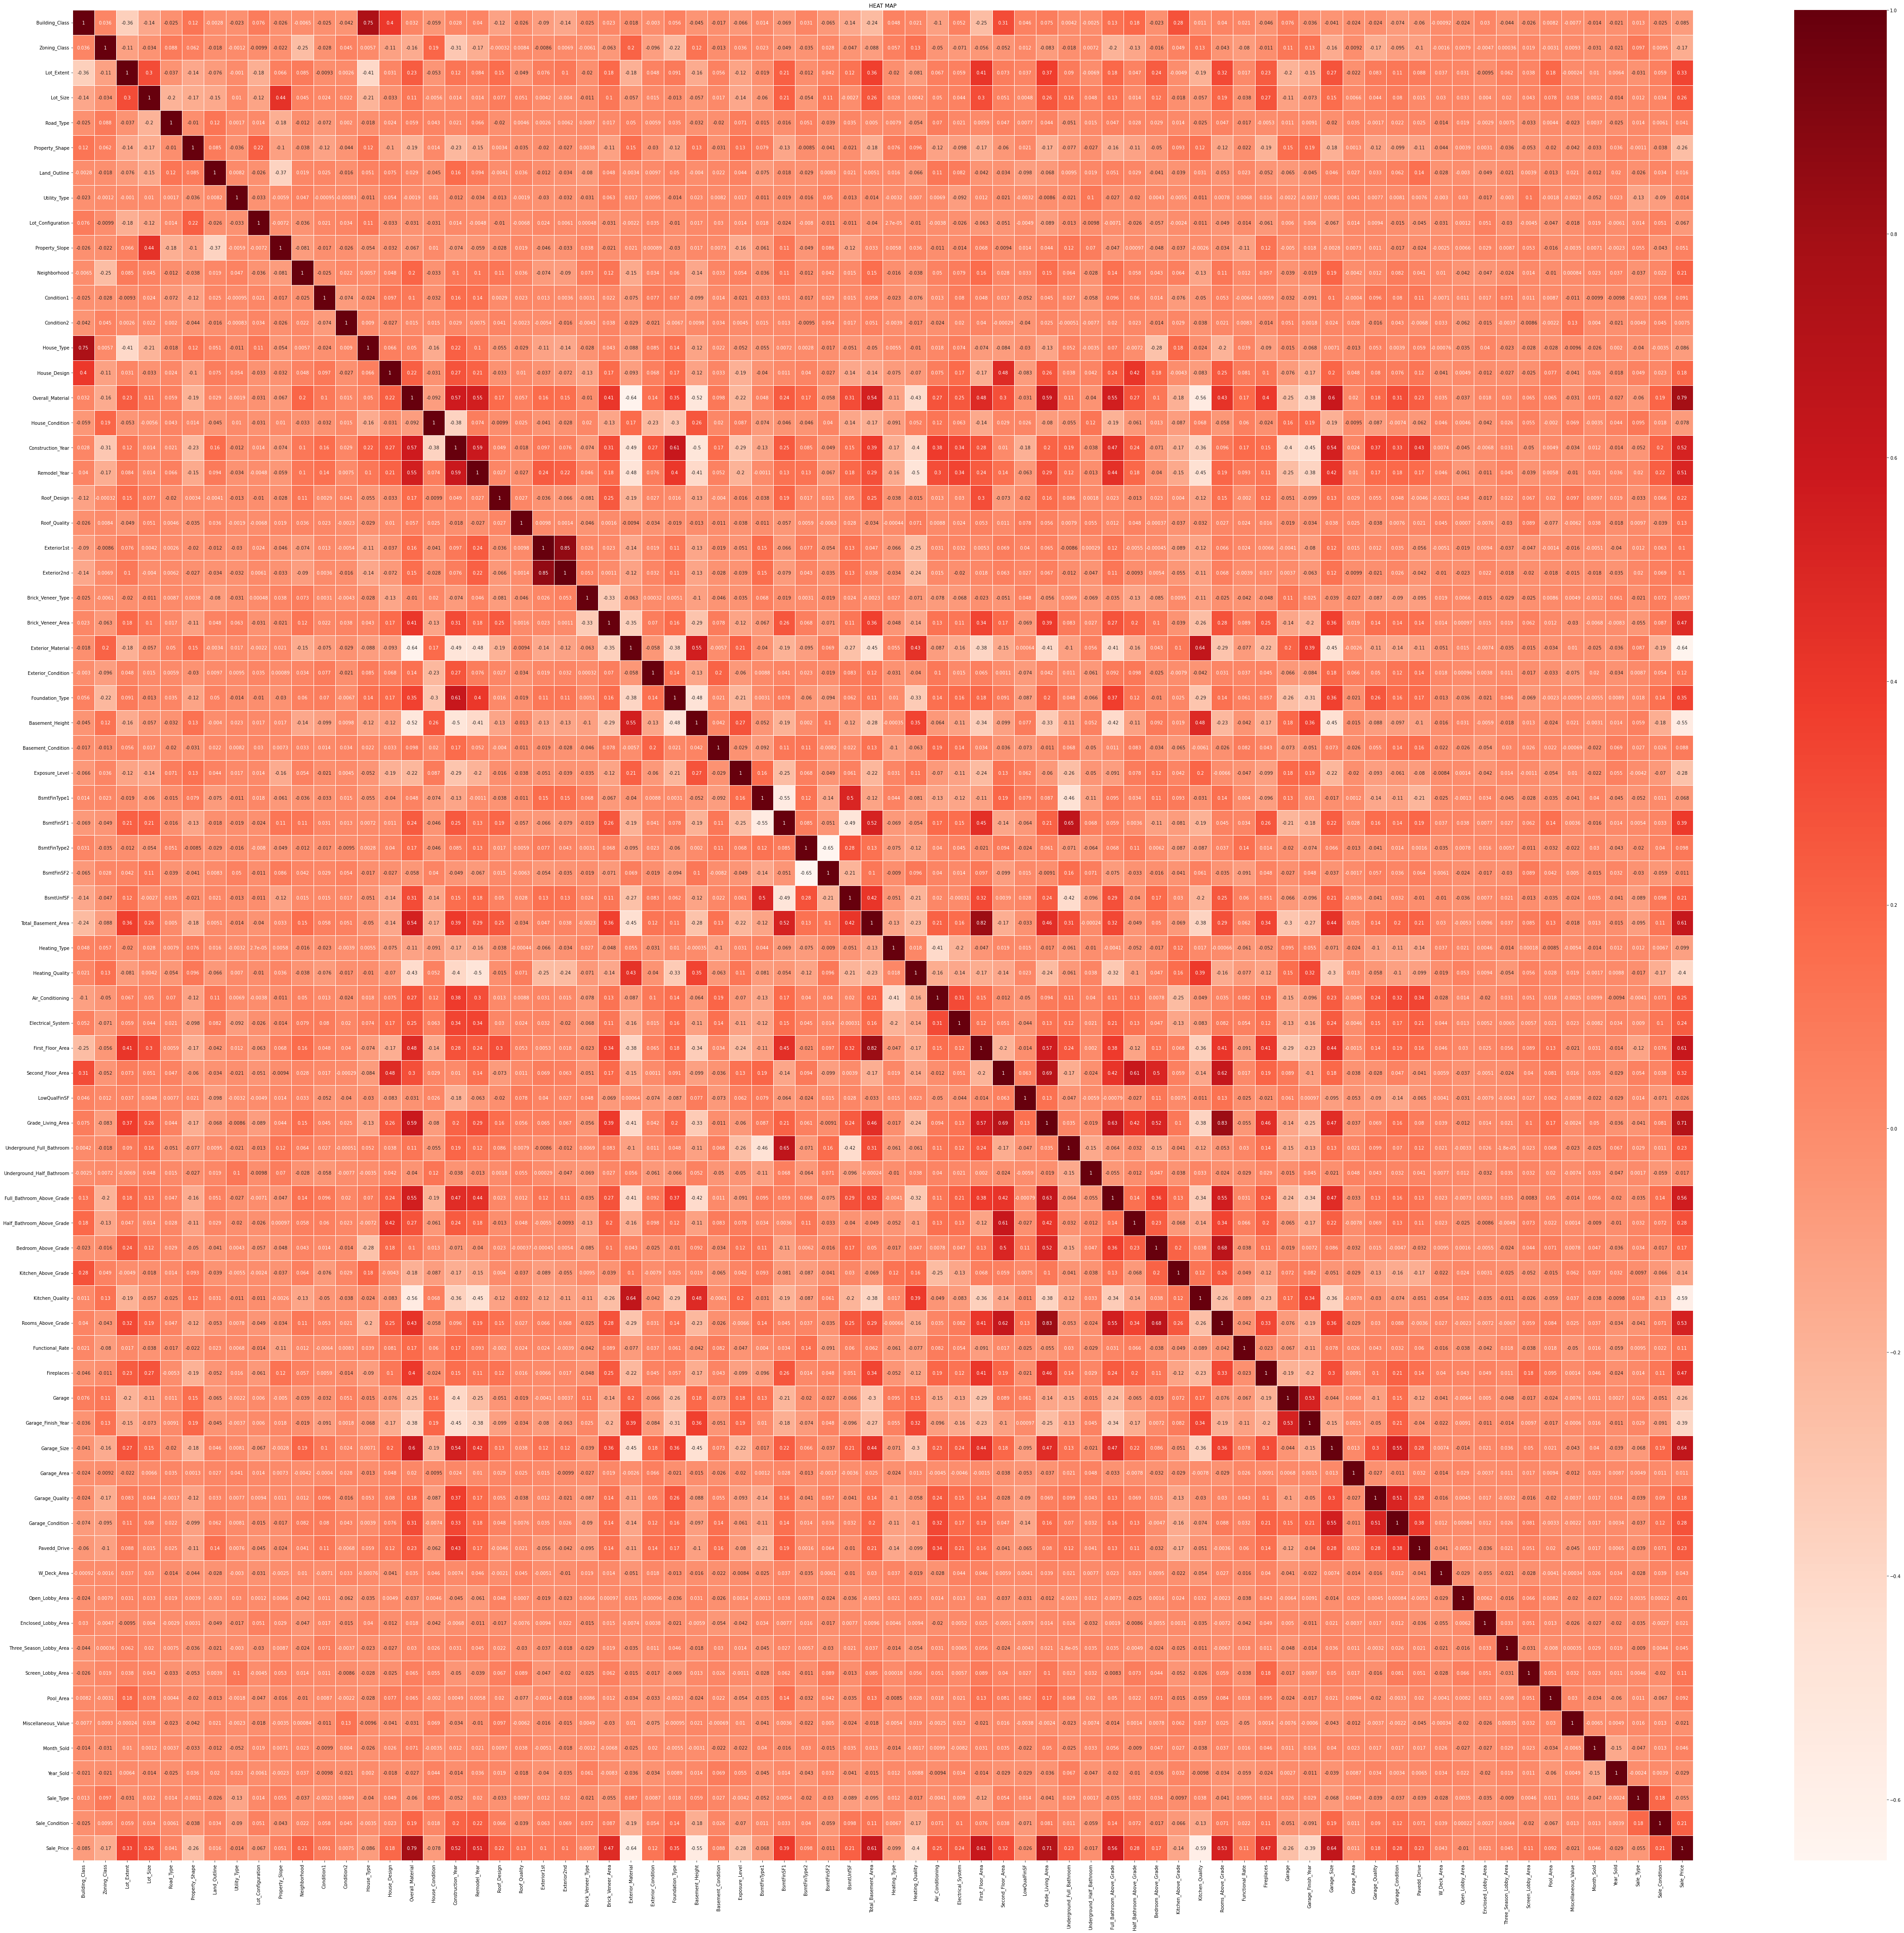

In [36]:
plt.figure(figsize=(80,75))
heatmap=sns.heatmap(data_1,linewidth=1,annot=True,cmap=plt.cm.Reds)
plt.title('HEAT MAP')
plt.show()

### Outlier treatment

<AxesSubplot:>

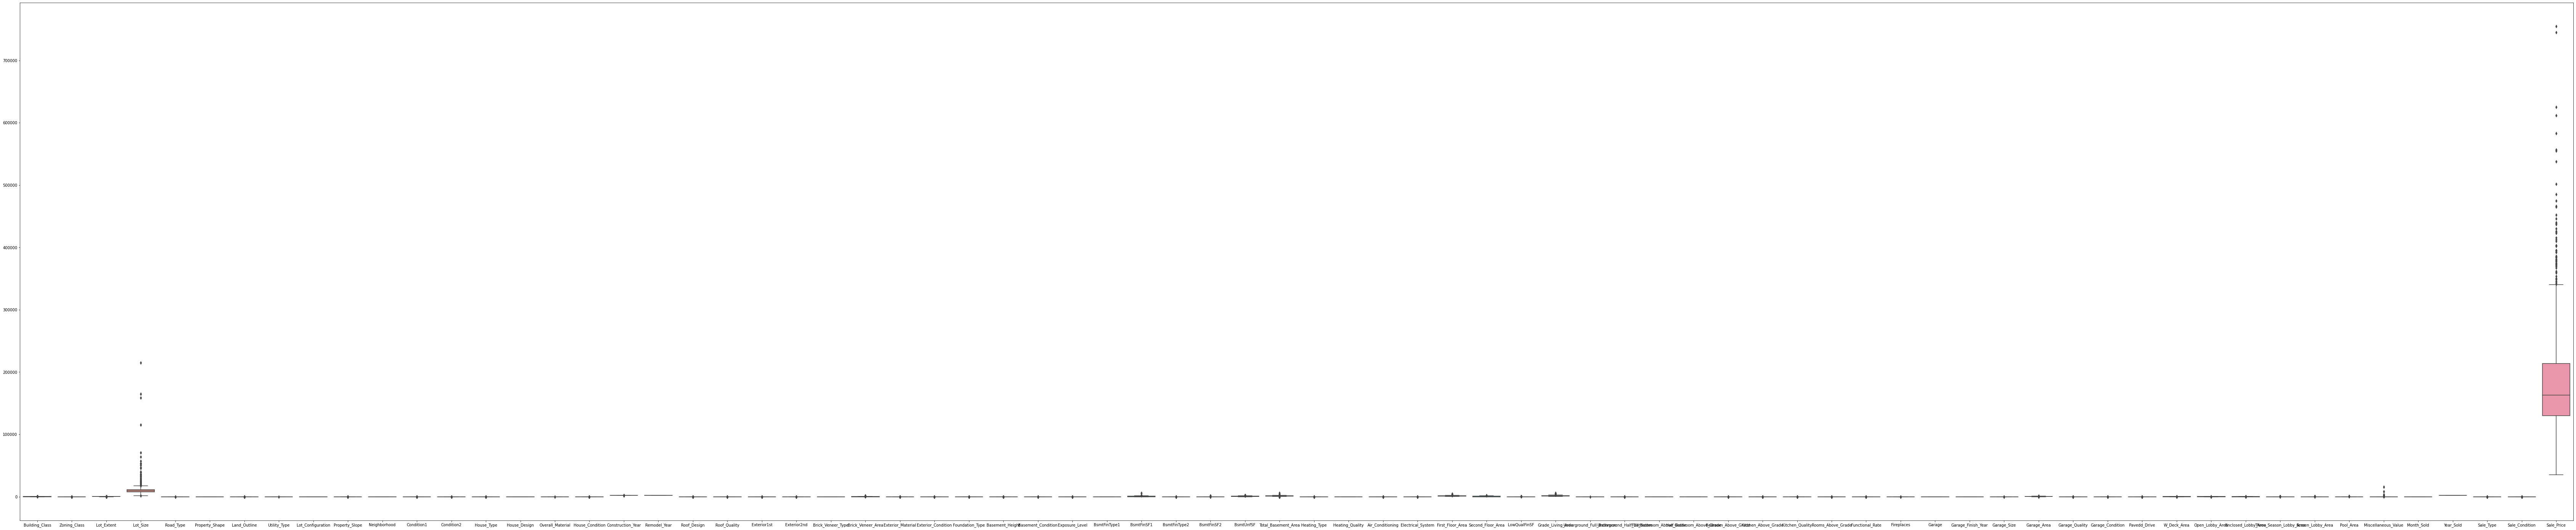

In [37]:
fig=plt.figure(figsize=(120,25))   # build boxplot of whole data for outlier treatment
sns.boxplot(data=data1)

In [38]:
import math
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
numerical_features = list(data1.select_dtypes(include=[np.number]).columns.values)

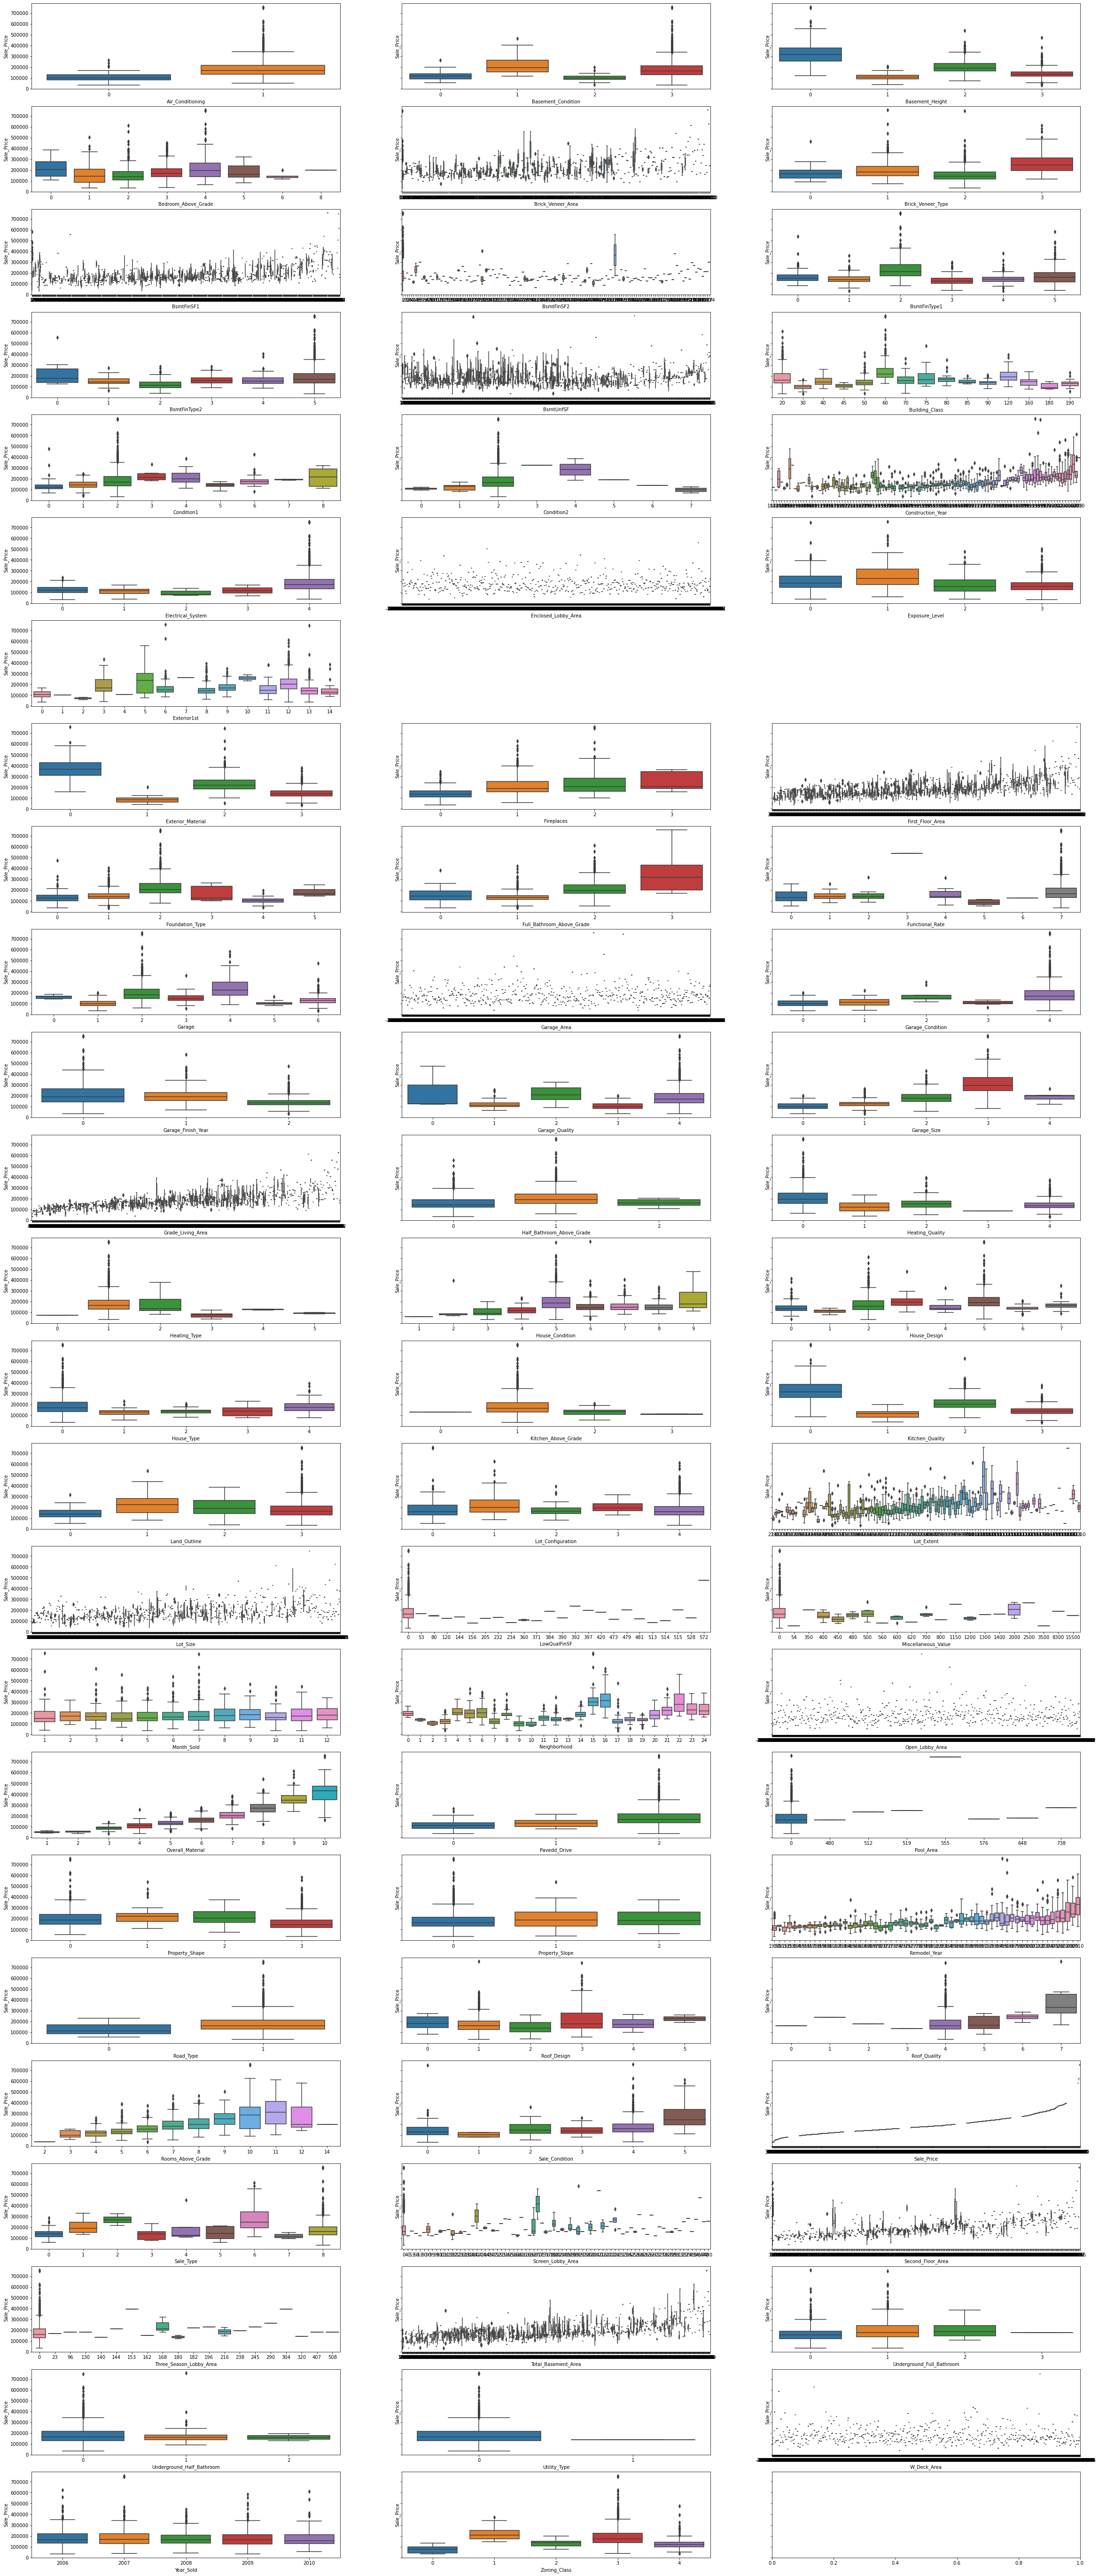

In [40]:
fig,ax = plt.subplots(math.ceil(len(numerical_features)/3),3,figsize=(40,100),sharey=True)
i ,j = 0, 0
for col in sorted(numerical_features):
    sns.boxplot(col,'Sale_Price',data=data1,ax=ax[i][j])
    if j == 2:
        j=0
        i +=1
    else:
        j +=1
ax[6][1].set_visible(False)
ax[6][2].set_visible(False)

In [41]:
def outliers(data,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    iqr=q3-q1
    
    l_b=q1-3*iqr
    u_b=q3+3*iqr
    
    print(l_b, u_b)

<AxesSubplot:xlabel='W_Deck_Area', ylabel='Density'>

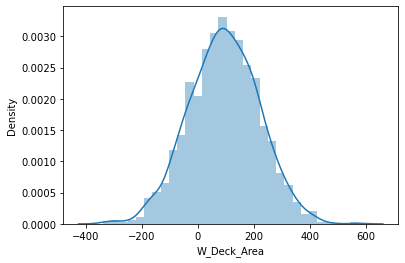

In [42]:
sns.distplot(data1['W_Deck_Area']) 

<AxesSubplot:ylabel='W_Deck_Area'>

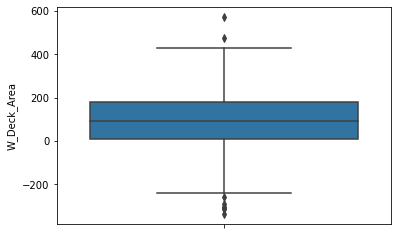

In [43]:
sns.boxplot(data=data1,y='W_Deck_Area')

In [44]:
outliers(data1,'W_Deck_Area')

-502.38385310200005 692.3758652390001


In [45]:
data1.loc[data1['W_Deck_Area']>693,'W_Deck_Area']=692.0
data1.loc[data1['W_Deck_Area']<-502,'W_Deck_Area']=-502.0

<AxesSubplot:xlabel='W_Deck_Area', ylabel='Density'>

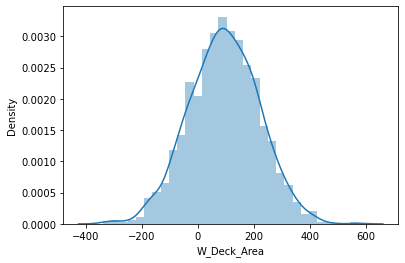

In [46]:
sns.distplot(data1['W_Deck_Area'])

<AxesSubplot:xlabel='Lot_Extent', ylabel='Density'>

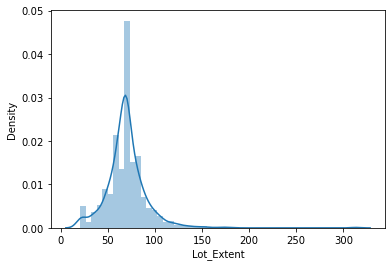

In [47]:
sns.distplot(data1['Lot_Extent'])

<AxesSubplot:ylabel='Lot_Extent'>

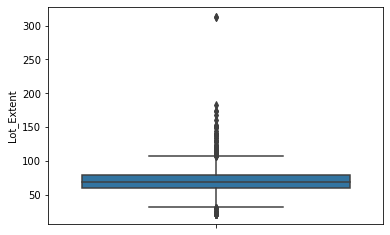

In [48]:
sns.boxplot(data=data1,y='Lot_Extent')

In [49]:
outliers(data1,'Lot_Extent')

3.0 136.0


In [50]:
data1.loc[data1['Lot_Extent']>136.0,'Lot_Extent']=136.0
data1.loc[data1['Lot_Extent']<3.0,'Lot_Extent']=3.0

<AxesSubplot:xlabel='Lot_Extent', ylabel='Density'>

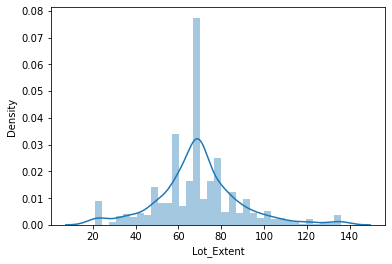

In [51]:
sns.distplot(data1['Lot_Extent'])

<AxesSubplot:xlabel='Lot_Size', ylabel='Density'>

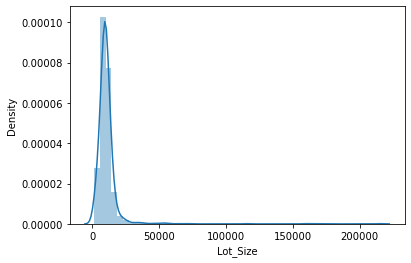

In [52]:
sns.distplot(data1['Lot_Size'])

<AxesSubplot:ylabel='Lot_Size'>

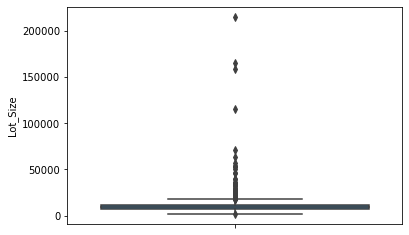

In [53]:
sns.boxplot(data=data1,y='Lot_Size')

In [54]:
outliers(data1,'Lot_Size')

-4613.0 23765.0


In [55]:
data1.loc[data1['Lot_Size']>23765.0,'Lot_Size']=23765.0
data1.loc[data1['Lot_Size']<-4613.0,'Lot_Size']=-4613.0

<AxesSubplot:xlabel='Lot_Size', ylabel='Density'>

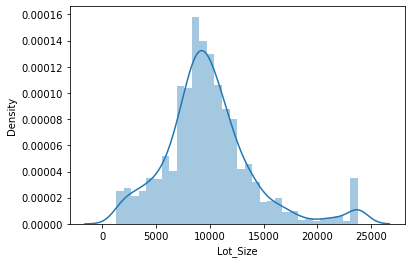

In [56]:
sns.distplot(data1['Lot_Size'])

<AxesSubplot:ylabel='Brick_Veneer_Area'>

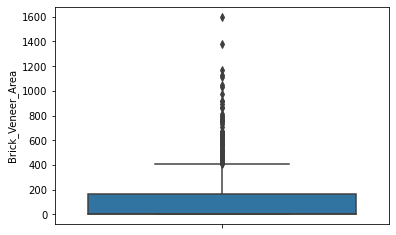

In [57]:
sns.boxplot(data=data1,y='Brick_Veneer_Area')

In [58]:
outliers(data1,'Brick_Veneer_Area')

-493.5 658.0


In [59]:
data1.loc[data1['Brick_Veneer_Area']>658.5,'Brick_Veneer_Area']=658.5

<AxesSubplot:xlabel='Brick_Veneer_Area', ylabel='Density'>

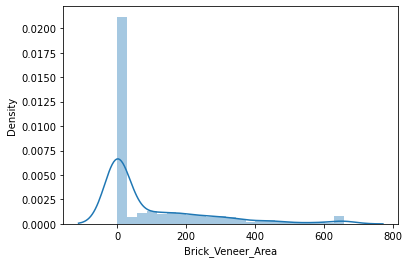

In [60]:
sns.distplot(data1['Brick_Veneer_Area'])

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Density'>

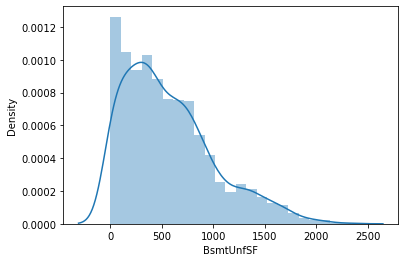

In [61]:
sns.distplot(data1['BsmtUnfSF'])

<AxesSubplot:ylabel='BsmtUnfSF'>

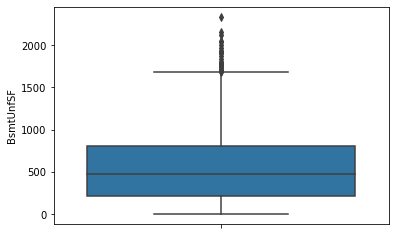

In [62]:
sns.boxplot(data=data1,y='BsmtUnfSF')

In [63]:
outliers(data1,'BsmtUnfSF')

-1530.0 2561.5


In [64]:
data1.loc[data1['BsmtUnfSF']>2561.5,'BsmtUnfSF']=2561.5

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Density'>

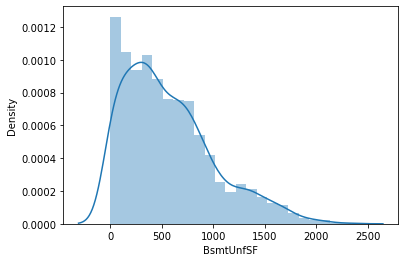

In [65]:
sns.distplot(data1['BsmtUnfSF'])

<AxesSubplot:xlabel='Total_Basement_Area', ylabel='Density'>

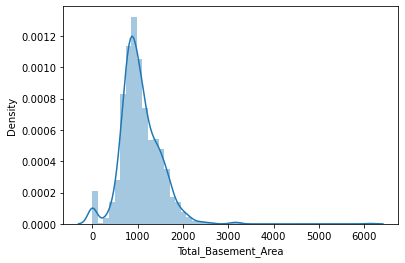

In [66]:
sns.distplot(data1['Total_Basement_Area'])

<AxesSubplot:ylabel='Total_Basement_Area'>

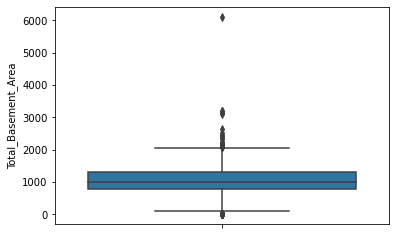

In [67]:
sns.boxplot(data=data1,y='Total_Basement_Area')

In [68]:
outliers(data1,'Total_Basement_Area')

-713.5 2807.5


In [69]:
data1.loc[data1['Total_Basement_Area']>2807.5,'Total_Basement_Area']=2807.5
data1.loc[data1['Total_Basement_Area']<-713.5,'Total_Basement_Area']=-713.5


<AxesSubplot:xlabel='Total_Basement_Area', ylabel='Density'>

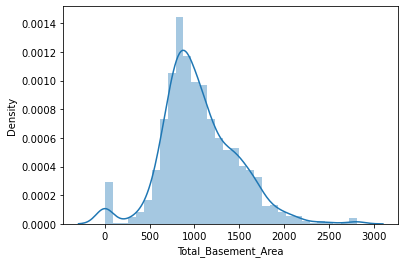

In [70]:
sns.distplot(data1['Total_Basement_Area'])

<AxesSubplot:xlabel='First_Floor_Area', ylabel='Density'>

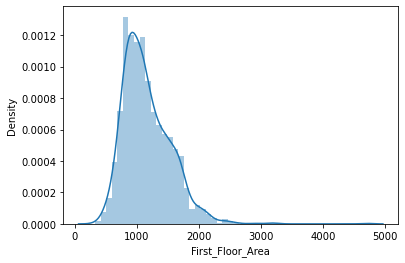

In [71]:
sns.distplot(data1['First_Floor_Area'])

<AxesSubplot:ylabel='First_Floor_Area'>

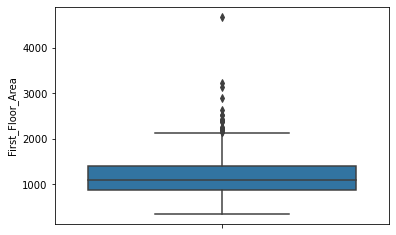

In [72]:
sns.boxplot(data=data1,y='First_Floor_Area')

In [73]:
outliers(data1,'First_Floor_Area')

-646.5 2920.0


In [74]:
data1.loc[data1['First_Floor_Area']>2920.0,'First_Floor_Area']=2920.0

<AxesSubplot:xlabel='First_Floor_Area', ylabel='Density'>

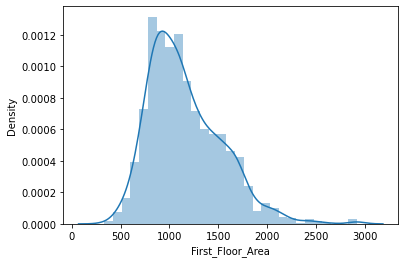

In [75]:
sns.distplot(data1['First_Floor_Area'])

<AxesSubplot:xlabel='Second_Floor_Area', ylabel='Density'>

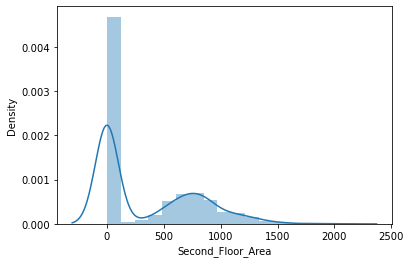

In [76]:
sns.distplot(data1['Second_Floor_Area'])

<AxesSubplot:ylabel='Second_Floor_Area'>

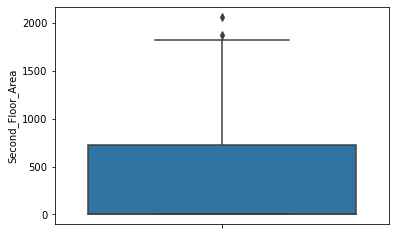

In [77]:
sns.boxplot(data=data1,y='Second_Floor_Area')

In [78]:
outliers(data1,'Second_Floor_Area')

-2184.0 2912.0


In [79]:
data1.loc[data1['Second_Floor_Area']>2912.0,'Second_Floor_Area']=2912.0

<AxesSubplot:xlabel='Second_Floor_Area', ylabel='Density'>

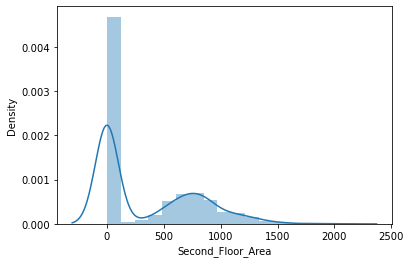

In [80]:
sns.distplot(data1['Second_Floor_Area'])

<AxesSubplot:xlabel='Grade_Living_Area', ylabel='Density'>

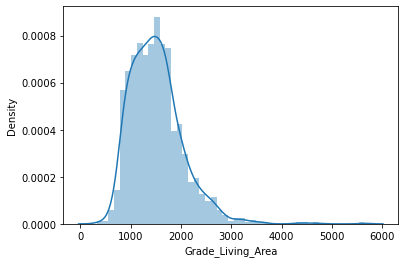

In [81]:
sns.distplot(data1['Grade_Living_Area'])

<AxesSubplot:ylabel='Grade_Living_Area'>

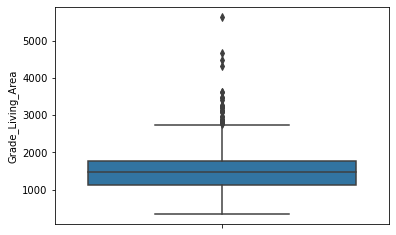

In [82]:
sns.boxplot(data=data1,y='Grade_Living_Area')

In [83]:
outliers(data1,'Grade_Living_Area')

-816.5 3723.0


In [84]:
data1.loc[data1['Grade_Living_Area']>3723.5,'Grade_Living_Area']=3723.5

<AxesSubplot:xlabel='Grade_Living_Area', ylabel='Density'>

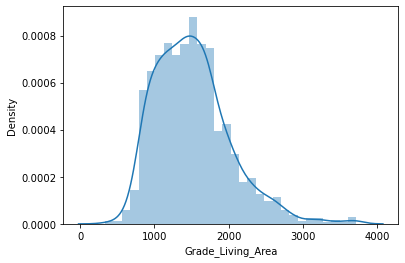

In [85]:
sns.distplot(data1['Grade_Living_Area'])

<AxesSubplot:xlabel='Enclosed_Lobby_Area', ylabel='Density'>

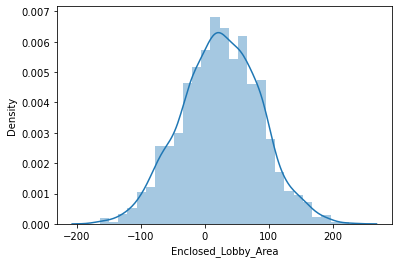

In [86]:
sns.distplot(data1['Enclosed_Lobby_Area'])

<AxesSubplot:ylabel='Enclosed_Lobby_Area'>

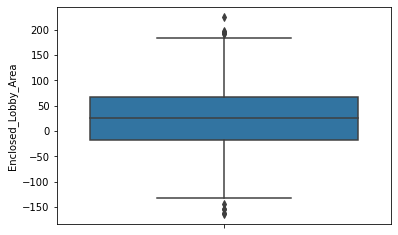

In [87]:
sns.boxplot(data=data1,y='Enclosed_Lobby_Area')

In [88]:
outliers(data1,'Enclosed_Lobby_Area')

-265.94198031499997 315.37226939


In [89]:
data1.loc[data1['Enclosed_Lobby_Area']>315,'Enclosed_Lobby_Area']=315
data1.loc[data1['Enclosed_Lobby_Area']<-266,'Enclosed_Lobby_Area']=-266

<AxesSubplot:xlabel='Enclosed_Lobby_Area', ylabel='Density'>

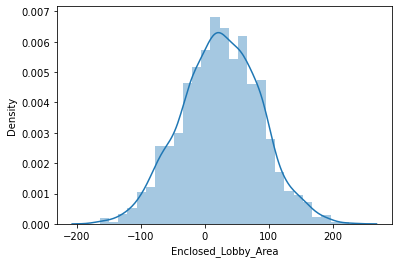

In [90]:
sns.distplot(data1['Enclosed_Lobby_Area'])

<AxesSubplot:xlabel='Garage_Area', ylabel='Density'>

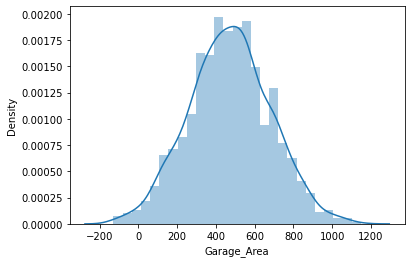

In [91]:
sns.distplot(data1['Garage_Area'])

<AxesSubplot:ylabel='Garage_Area'>

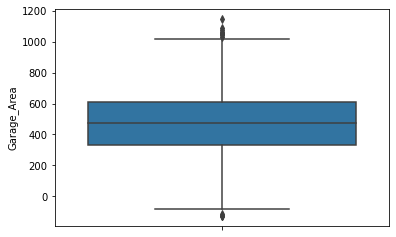

In [92]:
sns.boxplot(data=data1,y='Garage_Area')

In [93]:
outliers(data1,'Garage_Area')

-504.39297594999994 1440.8684424999997


In [94]:
data1.loc[data1['Garage_Area']>1441,'Garage_Area']=1441
data1.loc[data1['Garage_Area']<-504,'Garage_Area']=-504

<AxesSubplot:xlabel='Garage_Area', ylabel='Density'>

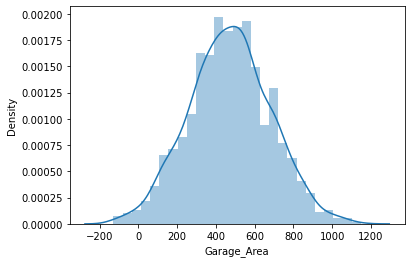

In [95]:
sns.distplot(data1['Garage_Area'])

<AxesSubplot:xlabel='Open_Lobby_Area', ylabel='Density'>

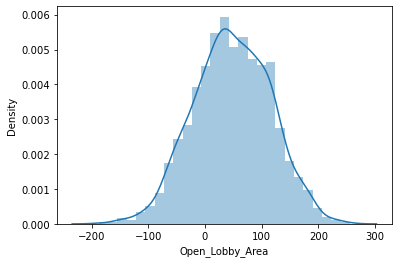

In [96]:
sns.distplot(data1['Open_Lobby_Area'])

<AxesSubplot:ylabel='Open_Lobby_Area'>

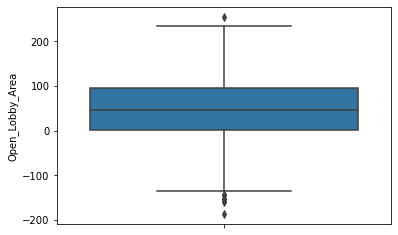

In [97]:
sns.boxplot(data=data1,y='Open_Lobby_Area')

In [98]:
outliers(data1,'Open_Lobby_Area')

-282.19771396000004 380.5643854625


In [99]:
data1.loc[data1['Open_Lobby_Area']>380.9,'Open_Lobby_Area']=380.9
data1.loc[data1['Open_Lobby_Area']<-282.6,'Open_Lobby_Area']=-282.6

<AxesSubplot:xlabel='Open_Lobby_Area', ylabel='Density'>

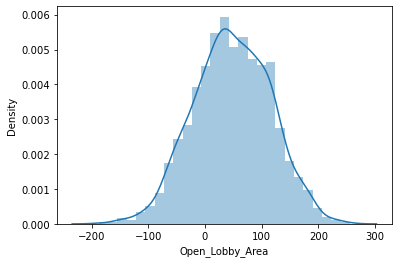

In [100]:
sns.distplot(data1['Open_Lobby_Area'])

<AxesSubplot:>

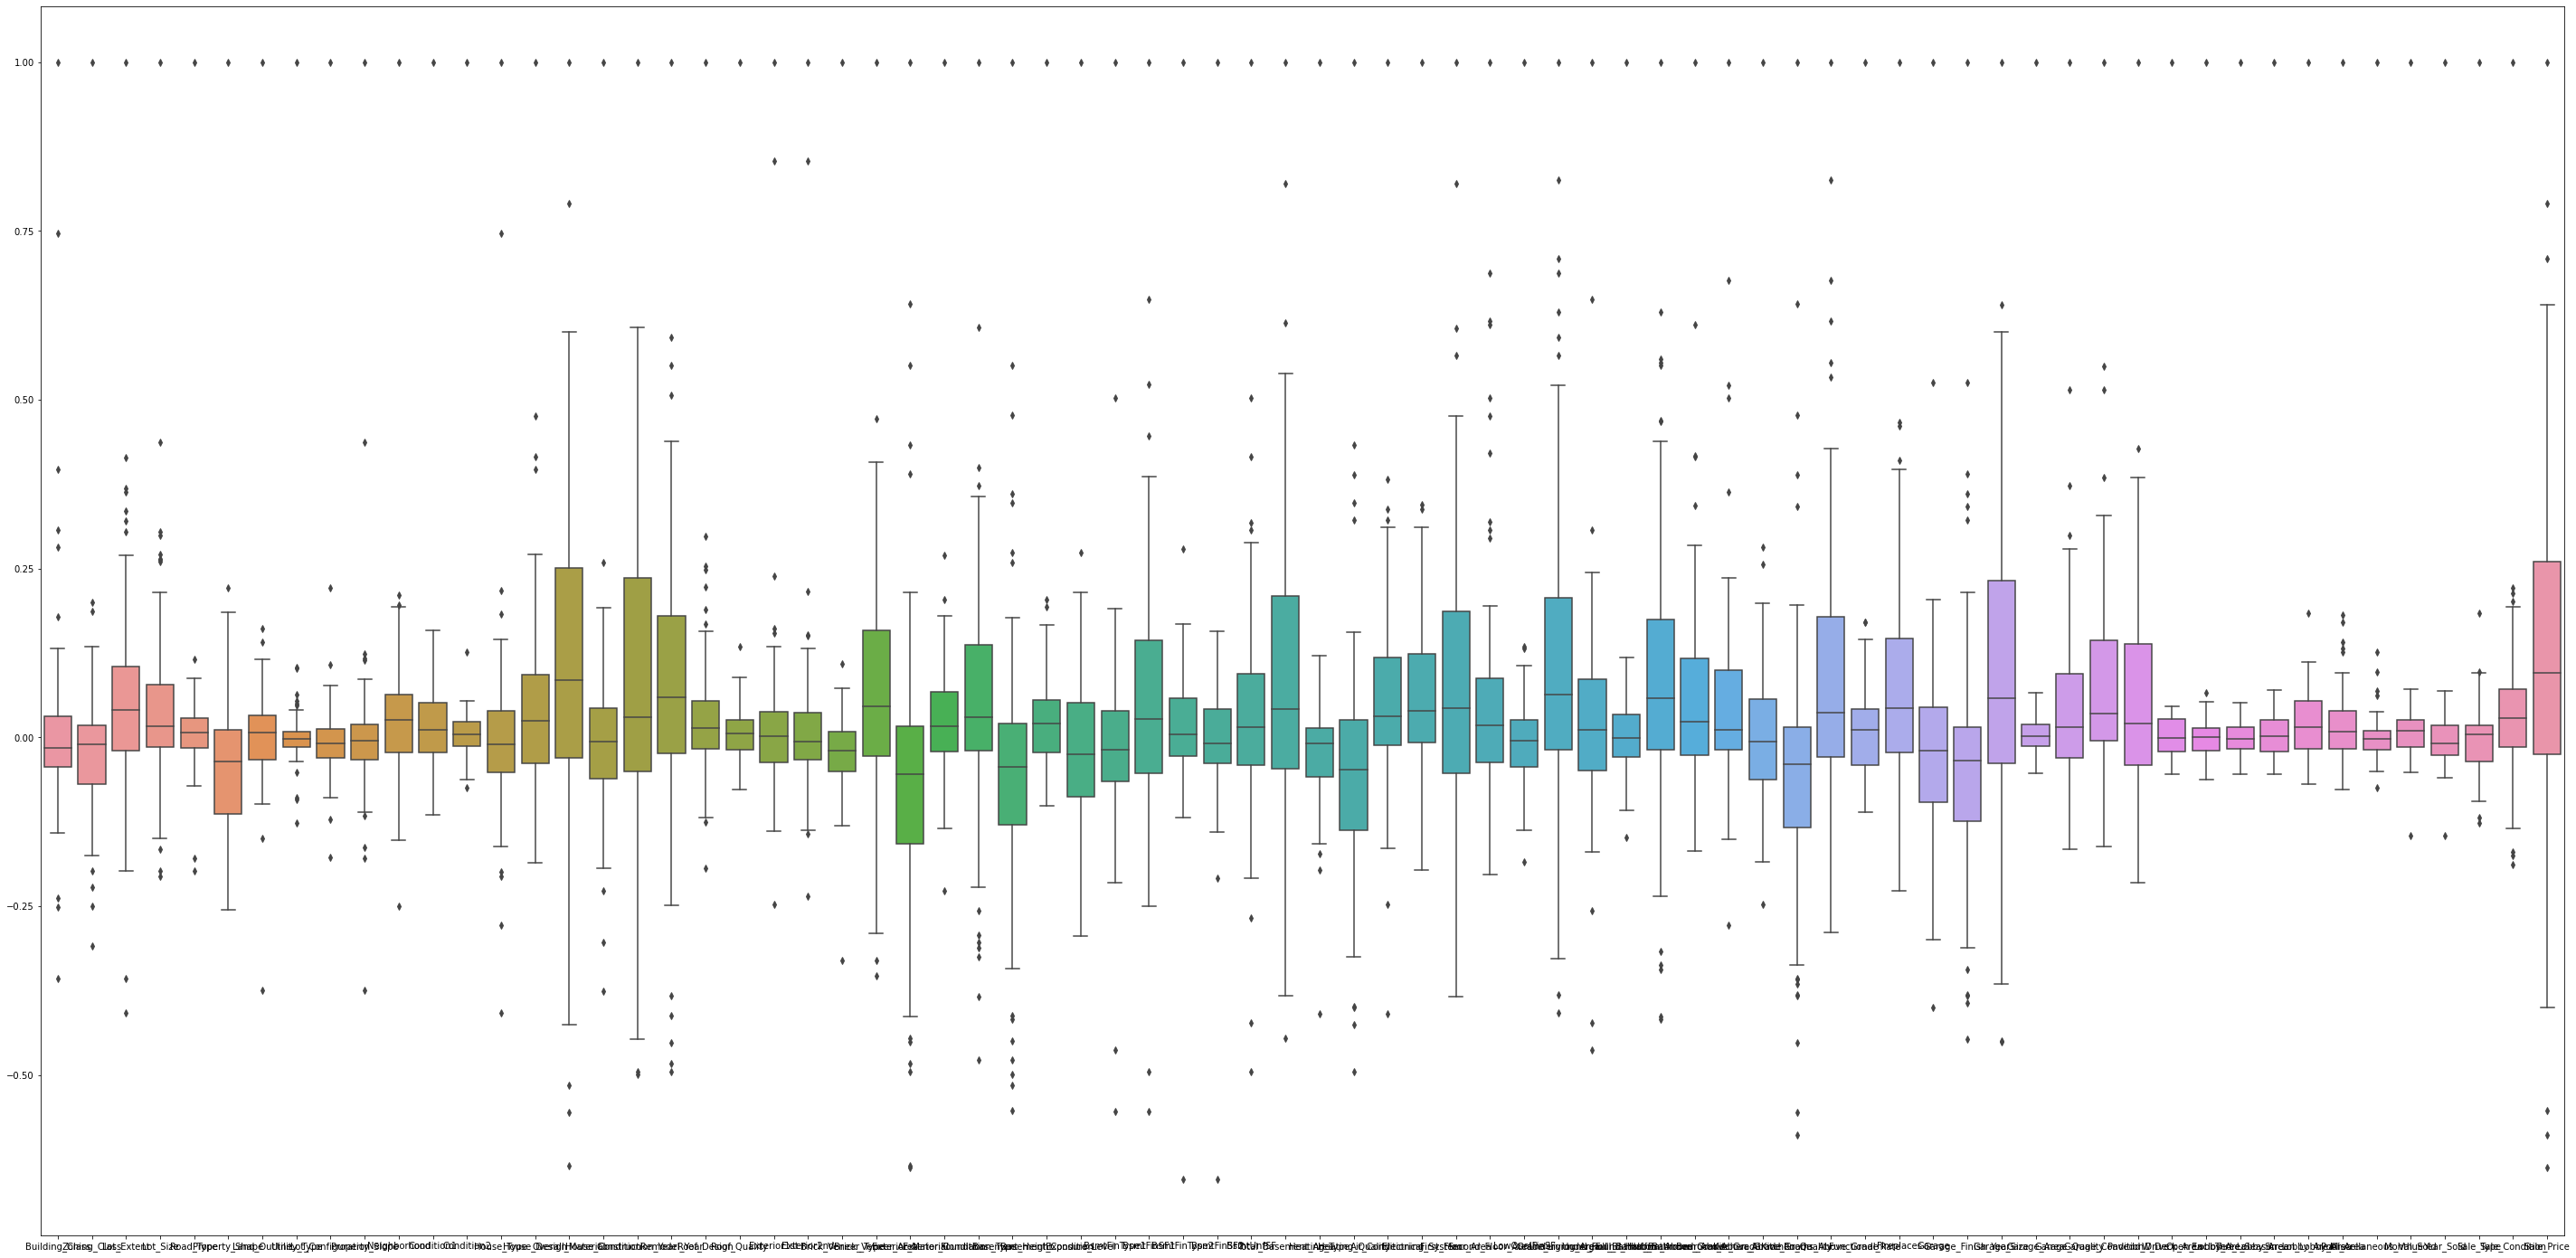

In [101]:
fig=plt.figure(figsize=(50,25))
sns.boxplot(data=data_1)

In [102]:
def top_unique_count(x):
    unq_cnt = ( x.value_counts(ascending=False,dropna=False).head(1).index.values[0],
               100 * x.value_counts(ascending=False,dropna=False).head(1).values[0]/data1.shape[0],
               x.value_counts(ascending=False,dropna=False).head(1).values[0])
    return unq_cnt

In [103]:
unique_data1 = data1.apply(lambda x: top_unique_count(x)).rename(index={0:"Value",1:'Percentage',2:'Count'})\
    .T.sort_values(by='Count',ascending=False)
unique_data1.head(50)

Value  Percentage   Count
Utility_Type                 0.0   99.931460  1458.0
Road_Type                    1.0   99.588759  1453.0
Pool_Area                    0.0   99.520219  1452.0
Condition2                   2.0   98.971899  1444.0
Three_Season_Lobby_Area      0.0   98.355038  1435.0
LowQualFinSF                 0.0   98.217958  1433.0
Roof_Quality                 4.0   98.217958  1433.0
Heating_Type                 1.0   97.806717  1427.0
Miscellaneous_Value          0.0   96.435915  1407.0
Kitchen_Above_Grade          1.0   95.339273  1391.0
Property_Slope               0.0   94.653873  1381.0
Underground_Half_Bathroom    0.0   94.379712  1377.0
Air_Conditioning             1.0   93.488691  1364.0
Functional_Rate              7.0   93.145990  1359.0
Screen_Lobby_Area            0.0   92.049349  1343.0
Pavedd_Drive                 2.0   91.775188  1339.0
Electrical_System            4.0   91.363948  1333.0
Garage_Condition             4.0   90.815627  1325.0
Basement_Condition           3.0   89.787526  1310.0
Land_Outline                 3.0   89.787526  1310.0
Garage_Quality               4.0   89.787526  1310.0
BsmtFinSF2                   0.0   88.622344  1293.0
Exterior_Condition           4.0   87.799863  1281.0
Sale_Type                    8.0   86.771761  1266.0
Condition1                   2.0   86.291981  1259.0
BsmtFinType2                 5.0   86.086361  1256.0
House_Type                   0.0   83.550377  1219.0
Sale_Condition               4.0   82.042495  1197.0
Zoning_Class                 3.0   78.821110  1150.0
Roof_Design                  1.0   78.135709  1140.0
Lot_Configuration            4.0   72.035641  1051.0
Exposure_Level               3.0   65.250171   952.0
Property_Shape               3.0   63.331049   924.0
Half_Bathroom_Above_Grade    0.0   62.577108   913.0
Exterior_Material            3.0   62.097327   906.0
Garage                       2.0   59.561343   869.0
Brick_Veneer_Area            0.0   59.492803   868.0
Brick_Veneer_Type            2.0   59.150103   863.0
Underground_Full_Bathroom    0.0   58.670322   856.0
Second_Floor_Area            0.0   56.751199   828.0
Garage_Size                  2.0   56.477039   824.0
House_Condition              5.0   56.271419   821.0
Bedroom_Above_Grade          3.0   55.037697   803.0
Full_Bathroom_Above_Grade    2.0   52.638794   768.0
Heating_Quality              0.0   50.788211   741.0
Kitchen_Quality              3.0   50.308430   734.0
House_Design                 2.0   49.691570   725.0
Fireplaces                   0.0   47.224126   689.0
Basement_Height              3.0   44.413982   648.0
Foundation_Type              2.0   44.345442   647.0

# Model Builing on Train Data 

In [104]:
data1.shape

(1459, 74)

In [105]:
data1_x=data1.iloc[:,:73]
data1_y=data1.iloc[:,-1]
data1_x.shape, data1_y.shape

((1459, 73), (1459,))

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test, y_train, y_test=train_test_split(data1_x,data1_y,test_size=0.2,random_state=100)

In [108]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((1167, 73), (292, 73), (1167,), (292,))

### Linear Redgression

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lr = LinearRegression()

In [111]:
lr.fit(x_train,y_train)

LinearRegression()

In [112]:
lr_p = lr.predict(x_test)
lr_p

array([208545.83790044, 149560.2863001 , 126254.66291779, 338980.1706229 ,
       245811.63776227, 157243.48166833, 126454.43234802, 125507.33915842,
       340981.37047016, 136926.03724295, 169906.43836164, 235895.64521618,
       113560.33564316,  79095.79936625, 188922.68690712, 152445.58888529,
       355077.3312022 , 205385.1070023 , 218678.29372487,  93942.93487482,
       112146.32002909, 193332.0750876 , 109143.66254144, 172925.69228142,
       154073.1562671 , 187079.53117237, 144765.10551526, 245902.79591934,
        95959.24947072, 197575.39952347, 200318.25737106, 381155.40433314,
       343304.29386262, 131287.70010431, 192017.84985305, 133412.39590205,
       184541.70925432, 125171.44641952, 269842.51285528, 149553.91272485,
        91627.09912922, 175690.95483882,  96618.4630882 , 108063.43494826,
       159256.84066133,  84241.44079231, 178685.53703232,  79069.74484224,
       278917.66028197, 219221.66452798, 346384.64731844, 109086.85576669,
       296286.44573591, 1

In [113]:
print('\nIntercept:', lr.intercept_)


Intercept: 203293.84155646767


In [114]:
print('Coefficients:', lr.coef_)

Coefficients: [-6.82917565e+01 -1.36434406e+03 -1.32455196e+01  1.32135315e+00
  2.44826979e+04 -4.42118871e+01  4.41052994e+02 -3.00673549e+04
 -1.40039443e+02  5.32585600e+03  2.30452256e+02 -1.98056510e+03
 -1.67701569e+04 -1.90961703e+03 -2.86810622e+02  8.92581964e+03
  6.30328149e+03  2.30414147e+02  6.94396935e+01  7.12346524e+02
  6.47288863e+03 -6.99243819e+02  1.41691364e+02  5.51102908e+03
  3.18477531e+01 -9.15390285e+03  1.09320977e+03  2.01750915e+03
 -9.32538006e+03  1.11932823e+03 -2.12809328e+03  1.24323776e+02
 -1.32716029e+02 -1.05907591e+03 -1.48412279e+02 -1.54109935e+02
  1.86931656e+02  2.11510310e+00 -7.52836011e+02  8.21132225e+02
 -7.58177437e+02  1.61542052e+01  2.80568078e+01 -4.95979743e+01
  3.18149297e+01  2.68913744e+03 -9.49127962e+02  4.77996198e+02
  1.65830117e+03 -6.12850451e+03 -1.47358227e+04 -6.64274728e+03
  1.25813773e+03  2.43189911e+03  4.33128670e+03  1.12199149e+03
 -7.04107220e+02  5.64606962e+03  4.31950230e+00  2.56708622e+03
 -2.6058113

In [115]:
# r-suare -- sampled r-square
R2=lr.score(x_train,y_train)
R2

0.8848023189141819

In [116]:
# n= total sample size
# p= no of independent var
AdjR2=1-(((1-R2)*(1167-1))/(1167-73-1))
AdjR2

0.8771084207263825

In [117]:
from sklearn import metrics

In [118]:
# MAE - mean absolute error
train_mae=metrics.mean_absolute_error(y_test,lr_p)
train_mae

18859.758855765424

In [119]:
# MSE - mean square error
train_mse=metrics.mean_squared_error(y_test,lr_p)
train_mse

799410835.2730565

In [120]:
#RMSE - root mean square error
rmse=np.sqrt(train_mse)
rmse

28273.854269856038

In [121]:
error=y_test-lr_p
error

789   -21045.837900
425   -14560.286300
204   -16254.662918
118   -18980.170623
244   -40811.637762
           ...     
907    25870.205396
372    17447.565308
913     2066.567108
133   -19529.262745
290   -10457.906977
Name: Sale_Price, Length: 292, dtype: float64

In [122]:
ab_error=np.abs(error)
ab_error

789    21045.837900
425    14560.286300
204    16254.662918
118    18980.170623
244    40811.637762
           ...     
907    25870.205396
372    17447.565308
913     2066.567108
133    19529.262745
290    10457.906977
Name: Sale_Price, Length: 292, dtype: float64

In [123]:
MAPE=np.mean(ab_error/y_test)*100
MAPE

12.017406428308052

In [124]:
Accuracy1=100-MAPE
Accuracy1

87.98259357169195

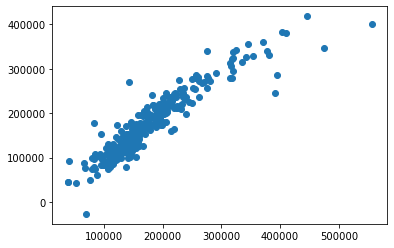

In [125]:
plt.scatter(y_test,lr_p)

<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

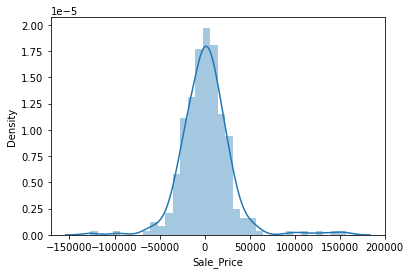

In [126]:
sns.distplot(y_test-lr_p)

## LASSO(L1)

In [127]:
#LASSO(L1) - feature selection and  to remove unsignificant values
from sklearn.linear_model import Lasso
lasso=Lasso()

In [128]:
x_train.shape, y_train.shape

((1167, 73), (1167,))

In [129]:
lasso.fit(x_train,y_train)

Lasso()

In [130]:
lasso.coef_

array([-6.83902262e+01, -1.36136866e+03, -1.33532685e+01,  1.32096907e+00,
        2.42447478e+04, -4.35563409e+01,  4.40930538e+02, -2.87871197e+04,
       -1.38601652e+02,  5.30414702e+03,  2.30116996e+02, -1.98195097e+03,
       -1.67649524e+04, -1.90925492e+03, -2.87357641e+02,  8.92817243e+03,
        6.30127487e+03,  2.30844890e+02,  6.95797767e+01,  7.11816405e+02,
        6.44671833e+03, -6.99360483e+02,  1.42279191e+02,  5.50865091e+03,
        3.18165517e+01, -9.14812144e+03,  1.08921925e+03,  2.01216969e+03,
       -9.32710108e+03,  1.11575812e+03, -2.12703306e+03,  1.22728526e+02,
       -1.32747835e+02, -1.05716475e+03, -1.48442554e+02, -1.54141452e+02,
        1.86961424e+02,  0.00000000e+00, -7.52322221e+02,  7.96157059e+02,
       -7.50846900e+02,  1.68624932e+01,  2.87669613e+01, -4.88485067e+01,
        3.11322810e+01,  2.68341702e+03, -9.50189437e+02,  4.60214225e+02,
        1.64986162e+03, -6.12580097e+03, -1.47024826e+04, -6.64062022e+03,
        1.25440185e+03,  

In [131]:
l_p=lasso.predict(x_test)
l_p

array([208554.33115973, 149582.59204625, 126250.84000443, 338986.14210972,
       245814.29614385, 157245.1401491 , 126451.13827907, 125537.54368184,
       340975.99120644, 136934.88700204, 169912.52361447, 235915.3764185 ,
       113561.42771012,  79137.92985785, 188911.40377413, 152466.75423594,
       355078.6885781 , 205405.67196873, 218659.22452403,  93949.48399066,
       112140.80226726, 193337.18499156, 109154.85069404, 172910.71710326,
       154097.45096396, 187042.40547747, 144738.43396145, 245881.14919664,
        95933.17607714, 197583.59003448, 200323.28312953, 381157.23933043,
       343298.46038396, 131289.93228033, 192020.86187681, 133422.09646923,
       184530.97874468, 125164.15468773, 269779.56284688, 149562.29457119,
        91645.63556151, 175715.7923803 ,  96628.93342978, 108017.7913902 ,
       159242.12625067,  84269.05935223, 178697.22881073,  79090.52222156,
       278858.019349  , 219238.06519121, 346317.74867383, 109096.08391931,
       296274.87105271, 1

In [132]:
l_R2=lasso.score(x_train,y_train)
l_R2

0.8848019640639598

In [133]:
Adjl_R2=1-(((1-l_R2)*(1167-1))/(1167-73-1))
Adjl_R2

0.8771080421761914

In [134]:
# MAE - mean absolute error
l_train_mae=metrics.mean_absolute_error(y_test,l_p)
l_train_mae

18856.84897788173

In [135]:
# MSE - mean square error
l_train_mse=metrics.mean_squared_error(y_test,l_p)
l_train_mse

799253751.5036712

In [136]:
#RMSE - root mean square error
l_rmse=np.sqrt(l_train_mse)
l_rmse

28271.076235327

In [137]:
l_error=y_test-l_p
l_error

789   -21054.331160
425   -14582.592046
204   -16250.840004
118   -18986.142110
244   -40814.296144
           ...     
907    25854.728648
372    17432.328067
913     2037.161596
133   -19534.211647
290   -10473.338163
Name: Sale_Price, Length: 292, dtype: float64

In [138]:
l_ab_error=np.abs(l_error)
l_ab_error

789    21054.331160
425    14582.592046
204    16250.840004
118    18986.142110
244    40814.296144
           ...     
907    25854.728648
372    17432.328067
913     2037.161596
133    19534.211647
290    10473.338163
Name: Sale_Price, Length: 292, dtype: float64

In [139]:
l_MAPE=np.mean(l_ab_error/y_test)*100
l_MAPE

12.014464847773748

In [140]:
Accuracy2=100-l_MAPE
Accuracy2

87.98553515222625

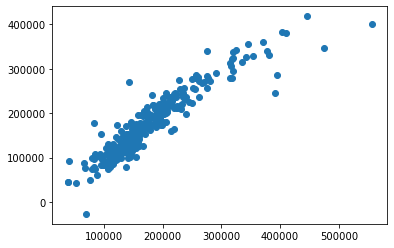

In [141]:
plt.scatter(y_test,l_p)

<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

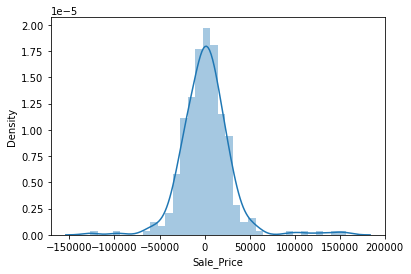

In [142]:
sns.distplot(y_test-l_p)

In [143]:
data1_df=pd.DataFrame({"importance":list(lasso.coef_),"columns":list(data1_x)})
data1_df

importance              columns
0     -68.390226       Building_Class
1   -1361.368662         Zoning_Class
2     -13.353268           Lot_Extent
3       1.320969             Lot_Size
4   24244.747797            Road_Type
..           ...                  ...
68     -0.151966  Miscellaneous_Value
69   -252.990232           Month_Sold
70   -402.262469            Year_Sold
71   -252.477006            Sale_Type
72   2264.970891       Sale_Condition

[73 rows x 2 columns]

In [144]:
data1_df.head(60)

importance                    columns
0     -68.390226             Building_Class
1   -1361.368662               Zoning_Class
2     -13.353268                 Lot_Extent
3       1.320969                   Lot_Size
4   24244.747797                  Road_Type
5     -43.556341             Property_Shape
6     440.930538               Land_Outline
7  -28787.119737               Utility_Type
8    -138.601652          Lot_Configuration
9    5304.147020             Property_Slope
10    230.116996               Neighborhood
11  -1981.950974                 Condition1
12 -16764.952381                 Condition2
13  -1909.254921                 House_Type
14   -287.357641               House_Design
15   8928.172432           Overall_Material
16   6301.274866            House_Condition
17    230.844890          Construction_Year
18     69.579777               Remodel_Year
19    711.816405                Roof_Design
20   6446.718327               Roof_Quality
21   -699.360483                Exterior1st
22    142.279191                Exterior2nd
23   5508.650915          Brick_Veneer_Type
24     31.816552          Brick_Veneer_Area
25  -9148.121437          Exterior_Material
26   1089.219252         Exterior_Condition
27   2012.169695            Foundation_Type
28  -9327.101077            Basement_Height
29   1115.758122         Basement_Condition
30  -2127.033063             Exposure_Level
31    122.728526               BsmtFinType1
32   -132.747835                 BsmtFinSF1
33  -1057.164750               BsmtFinType2
34   -148.442554                 BsmtFinSF2
35   -154.141452                  BsmtUnfSF
36    186.961424        Total_Basement_Area
37      0.000000               Heating_Type
38   -752.322221            Heating_Quality
39    796.157059           Air_Conditioning
40   -750.846900          Electrical_System
41     16.862493           First_Floor_Area
42     28.766961          Second_Floor_Area
43    -48.848507               LowQualFinSF
44     31.132281          Grade_Living_Area
45   2683.417021  Underground_Full_Bathroom
46   -950.189437  Underground_Half_Bathroom
47    460.214225  Full_Bathroom_Above_Grade
48   1649.861621  Half_Bathroom_Above_Grade
49  -6125.800970        Bedroom_Above_Grade
50 -14702.482580        Kitchen_Above_Grade
51  -6640.620224            Kitchen_Quality
52   1254.401850          Rooms_Above_Grade
53   2430.632903            Functional_Rate
54   4330.070248                 Fireplaces
55   1120.301814                     Garage
56   -702.070548         Garage_Finish_Year
57   5638.793983                Garage_Size
58      4.314678                Garage_Area
59   2561.068153             Garage_Quality

In [145]:
new_df=pd.DataFrame(data1,columns=['Lot_Extent','Lot_Size','Road_Type','Land_Outline','Overall_Material',
                                  'House_Condition','Roof_Quality','Exterior2nd','Brick_Veneer_Type','Brick_Veneer_Area',
                                  'BsmtFinType1','Total_Basement_Area','First_Floor_Area',
                                  'Second_Floor_Area','LowQualFinSF','Rooms_Above_Grade','Garage_Size',
                                  'Garage_Area','Garage_Quality','Pavedd_Drive','W_Deck_Area',
                                  'Open_Lobby_Area','Enclosed_Lobby_Area','Pool_Area','Sale_Condition','Sale_Price'])
#new_df

In [146]:
new_df.shape

(1459, 26)

In [147]:
new_x=new_df.iloc[:,:25]
new_y=new_df.iloc[:,-1]
new_x.shape, new_y.shape

((1459, 25), (1459,))

In [148]:
n_x_train,n_x_test,n_y_train,n_y_test=train_test_split(new_x,new_y,test_size=0.2,random_state=101)

In [149]:
n_x_train.shape,n_x_test.shape,n_y_train.shape,n_y_test.shape

((1167, 25), (292, 25), (1167,), (292,))

In [150]:
lr1=LinearRegression()

In [151]:
lr1.fit(n_x_train,n_y_train)

LinearRegression()

In [152]:
n_p=lr1.predict(n_x_test)
n_p

array([212348.53886137, 216800.35956552,  55143.26590248, 147085.82510218,
       186983.39329567, 183677.50262381, 322383.23420749, 205849.18804149,
       177920.03334084, 167787.58125434, 143218.24096353, 197648.8750871 ,
       242847.84427934, 175001.80401686, 109276.11656546, 102820.37395486,
       268735.52872582, 256765.73808948, 127248.48770993, 126031.81371567,
       130128.24125483, 363222.14068848, 168644.85111633, 201024.0649655 ,
        44673.00764022,  71460.96020832, 125037.89778247, 201477.31003763,
       164722.05142288, 116116.22918497, 201094.35924935, 114971.86418056,
       283519.89175803, 198255.14547479, 134944.00010918, 130779.71739967,
       313298.94158685, 144932.1231295 , 348026.64090494, 212169.62178563,
       177006.94422462, 192959.73871101, 208341.00149246, 133981.73051247,
       250406.03445275, 181799.50523936, 130193.15855312, 123027.85325748,
       128888.23556074,  15737.53917701, 143176.96909771, 162116.29065327,
        90661.97663601, 1

In [153]:
lr1.intercept_

-184929.72176338526

In [154]:
lr1.coef_

array([ 5.55341196e+01,  1.83605678e+00,  1.28000257e+04, -2.78542477e+02,
        2.10111995e+04,  2.79784503e+03,  5.60591672e+03, -9.89906405e+01,
        1.15269975e+04,  5.08553746e+01, -3.03500509e+03,  3.72076176e+01,
        5.54708211e+01,  5.76890484e+01, -8.88027801e+00, -2.73665869e+03,
        1.09238444e+04,  3.34247413e+00,  4.66583173e+02,  2.63955063e+03,
       -1.61654393e+00,  9.99267646e+00,  2.21913168e+01,  6.65628684e+01,
        4.25641311e+03])

In [155]:
n_r2=lr1.score(n_x_train,n_y_train)
n_r2

0.8190971588921142

In [156]:
n_adjr2=1-(((1-n_r2)*(1167-1)/(1167-25-1)))
n_adjr2

0.8151334682455786

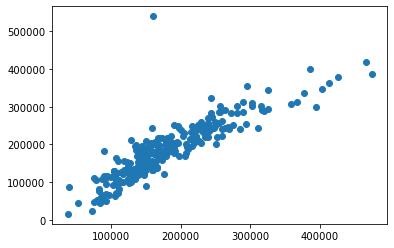

In [157]:
plt.scatter(n_y_test,n_p)

In [158]:
n_train_mae=metrics.mean_absolute_error(n_y_test,n_p)
n_train_mae

23310.56338940626

In [159]:
ntrain_mse=metrics.mean_squared_error(n_y_test,n_p)
ntrain_mse

1302949518.6009827

In [160]:
Lab_error=np.abs(l_error)
Lab_error

789    21054.331160
425    14582.592046
204    16250.840004
118    18986.142110
244    40814.296144
           ...     
907    25854.728648
372    17432.328067
913     2037.161596
133    19534.211647
290    10473.338163
Name: Sale_Price, Length: 292, dtype: float64

In [161]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [162]:
rd.fit(n_x_train,n_y_train)

Ridge()

In [163]:
r_p=rd.predict(n_x_test)
r_p

array([212297.45294126, 216837.82298289,  55158.03325517, 147042.23757423,
       186951.33229794, 183608.73308952, 322449.31714564, 205862.46172996,
       177964.35301417, 167833.08760733, 143232.00921196, 197657.42131949,
       242871.89101534, 174952.12106869, 109255.60395551, 102814.12795673,
       268803.55205015, 256780.16242899, 127295.59573074, 126033.15683809,
       130130.89335994, 363236.67694681, 168684.92307309, 201063.33024315,
        44626.99486678,  71421.1840737 , 125083.66284943, 201507.81520553,
       164841.09821331, 116114.7890288 , 201059.87529353, 114934.6119877 ,
       283565.19654506, 198210.72433465, 134979.29333999, 130755.99505259,
       313281.10912206, 144887.77899332, 348023.96672248, 212157.72174917,
       177015.47248081, 192980.50755192, 208327.80352116, 133927.99692759,
       250441.58917735, 181832.58655656, 130184.2971169 , 123070.36770234,
       128867.72440473,  15776.47219284, 143178.82536625, 162081.30602797,
        90756.39584255, 1

In [164]:
rd.coef_

array([ 5.54405700e+01,  1.83107964e+00,  1.08852362e+04, -2.53147001e+02,
        2.10038230e+04,  2.80250062e+03,  5.53127973e+03, -9.71773080e+01,
        1.15062591e+04,  5.08372448e+01, -3.03564524e+03,  3.72306309e+01,
        5.55402160e+01,  5.77383492e+01, -8.87901019e+00, -2.73185676e+03,
        1.08875537e+04,  3.38069670e+00,  4.78089109e+02,  2.63731114e+03,
       -1.62304533e+00,  1.00390950e+01,  2.21981375e+01,  6.65686460e+01,
        4.25631052e+03])

In [165]:
r_df=pd.DataFrame({"coeff":list(rd.coef_),"column":list(n_x_train)})
r_df

coeff               column
0      55.440570           Lot_Extent
1       1.831080             Lot_Size
2   10885.236196            Road_Type
3    -253.147001         Land_Outline
4   21003.822985     Overall_Material
5    2802.500619      House_Condition
6    5531.279730         Roof_Quality
7     -97.177308          Exterior2nd
8   11506.259076    Brick_Veneer_Type
9      50.837245    Brick_Veneer_Area
10  -3035.645240         BsmtFinType1
11     37.230631  Total_Basement_Area
12     55.540216     First_Floor_Area
13     57.738349    Second_Floor_Area
14     -8.879010         LowQualFinSF
15  -2731.856764    Rooms_Above_Grade
16  10887.553681          Garage_Size
17      3.380697          Garage_Area
18    478.089109       Garage_Quality
19   2637.311142         Pavedd_Drive
20     -1.623045          W_Deck_Area
21     10.039095      Open_Lobby_Area
22     22.198137  Enclosed_Lobby_Area
23     66.568646            Pool_Area
24   4256.310517       Sale_Condition

In [166]:
rd_r2=rd.score(n_x_train,n_y_train)
rd_r2

0.819094293234951

In [167]:
ad_rd2=1-(((1-rd_r2)*(1167-1))/(1167-25-1))
ad_rd2

0.815130539800134

In [168]:
l1=["linear","lasso","ridge"]
l2=[R2,l_R2 ,rd_r2]
l3=[AdjR2,Adjl_R2 , ad_rd2]

In [169]:
final_train = pd.DataFrame({'modelname':l1,"R-Square":l2,"Adj_R-Square":l3})
final_train

modelname  R-Square  Adj_R-Square
0    linear  0.884802      0.877108
1     lasso  0.884802      0.877108
2     ridge  0.819094      0.815131

## Prediction on whole data
### train and test data
#### Building model on test data 

In [170]:
data1.shape, test_2.shape

((1459, 74), (1459, 73))

In [171]:
test_2.head()

Building_Class  Zoning_Class  Lot_Extent  Lot_Size  Road_Type  \
0               0             2          56      1297          1   
1               0             3          57      1270          1   
2               5             3          50       163          1   
3               5             3          54       240          1   
4              11             3          19       127          1   

   Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
0               3             3             0                  4   
1               0             3             0                  0   
2               0             3             0                  4   
3               0             3             0                  4   
4               0             1             0                  4   

   Property_Slope  ...  Open_Lobby_Area  Enclosed_Lobby_Area  \
0               0  ...                0                    0   
1               0  ...               24                    0   
2               0  ...               22                    0   
3               0  ...               24                    0   
4               0  ...               68                    0   

   Three_Season_Lobby_Area  Screen_Lobby_Area  Pool_Area  Miscellaneous_Value  \
0                        0                 18          0                    0   
1                        0                  0          0                   24   
2                        0                  0          0                    0   
3                        0                  0          0                    0   
4                        0                 27          0                    0   

   Month_Sold  Year_Sold  Sale_Type  Sale_Condition  
0           5          4          8               6  
1           5          4          8               6  
2           2          4          8               6  
3           5          4          8               6  
4           0          4          8               6  

[5 rows x 73 columns]

In [172]:
 data1.shape, test_2.shape, data1_x.shape, data1_y.shape

((1459, 74), (1459, 73), (1459, 73), (1459,))

In [173]:
lr_t=LinearRegression()

In [174]:
lr_t.fit(data1_x,data1_y)

LinearRegression()

In [175]:
lr_test=lr_t.predict(test_2)
lr_test

array([676629.85683537, 698499.1618239 , 708858.63377497, ...,
       705016.75357683, 672484.73205736, 761199.65331314])

In [176]:
lr_t.intercept_

676531.8359455164

In [177]:
lr_t.coef_

array([-5.53179133e+01, -9.78591407e+02, -8.55372224e+00,  1.49492990e+00,
        2.56649586e+04, -2.24637051e+02,  6.16239062e+02, -3.22913076e+04,
       -1.50037186e+02,  3.83031483e+03,  2.47613851e+02, -1.75968223e+03,
       -8.28437575e+03, -1.26732130e+03, -5.26407293e+02,  9.38370259e+03,
        6.12545352e+03,  2.34600098e+02,  5.60745630e+01,  1.13776863e+03,
        7.03109252e+03, -8.38528007e+02,  3.68772718e+02,  4.91545028e+03,
        2.67441304e+01, -9.17403580e+03,  6.47593999e+02,  2.00112299e+03,
       -8.64082358e+03,  2.05366933e+03, -2.58469097e+03,  9.79960154e+01,
       -1.25939318e+02, -1.22216435e+03, -1.41813522e+02, -1.46714973e+02,
        1.75687457e+02, -7.86085173e+02, -6.84035721e+02, -2.68647314e+02,
       -5.31421353e+02,  2.42009566e+01,  3.40440325e+01, -2.02453614e+01,
        2.43299611e+01,  8.64319818e+02, -1.67647093e+03, -3.02686533e+02,
        5.35048983e+01, -5.77638294e+03, -1.85668665e+04, -6.87033392e+03,
        2.22193947e+03,  

<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

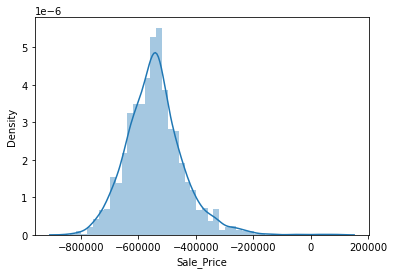

In [178]:
sns.distplot(data1_y-lr_test)

In [179]:
R_2=lr_t.score(data1_x,data1_y)
R_2

0.8830346668181809

In [180]:
AdjR_2=1-(((1-R_2)*(1459-1))/(1459-73-1))
AdjR_2

0.8768697070187059

In [181]:
# MAE - mean absolute error
test_mae=metrics.mean_absolute_error(data1_y,lr_test)
test_mae

542395.583659577

In [182]:
# MSE
test_mse=metrics.mean_squared_error(data1_y,lr_test) 
test_mse

303997541921.7076

In [183]:
lasso.fit(data1_x,data1_y)

Lasso()

In [184]:
lasso_p=lasso.predict(test_2)
lasso_p

array([676314.26079579, 698223.91082523, 708359.7644    , ...,
       704711.76316474, 672200.71729732, 760661.63349617])

In [185]:
lasso.intercept_

676340.0052218869

In [186]:
lasso.coef_

array([-5.53888386e+01, -9.76157960e+02, -8.62224720e+00,  1.49437476e+00,
        2.53676491e+04, -2.24069603e+02,  6.13582544e+02, -3.07123176e+04,
       -1.48776710e+02,  3.80791952e+03,  2.47194048e+02, -1.75941507e+03,
       -8.27995061e+03, -1.26863631e+03, -5.26638263e+02,  9.38517695e+03,
        6.12201288e+03,  2.34700383e+02,  5.61706919e+01,  1.13889515e+03,
        7.00602562e+03, -8.38424268e+02,  3.69230441e+02,  4.91404644e+03,
        2.67195275e+01, -9.17047682e+03,  6.44058213e+02,  1.99622094e+03,
       -8.64288271e+03,  2.04843011e+03, -2.58439677e+03,  9.63054322e+01,
       -1.25977943e+02, -1.21999466e+03, -1.41853537e+02, -1.46750432e+02,
        1.75726562e+02, -7.59428147e+02, -6.83033424e+02, -2.26424563e+02,
       -5.24918746e+02,  2.49032933e+01,  3.47492809e+01, -1.94985091e+01,
        2.36410254e+01,  8.61770063e+02, -1.67614351e+03, -2.99492370e+02,
        5.23195339e+01, -5.77577016e+03, -1.85265824e+04, -6.86948454e+03,
        2.21695018e+03,  

In [187]:
df=pd.DataFrame(lasso_p,columns=["Sale_Price"])
df

Sale_Price
0     676314.260796
1     698223.910825
2     708359.764400
3     711918.582505
4     747284.798535
...             ...
1454  644394.779517
1455  636203.161499
1456  704711.763165
1457  672200.717297
1458  760661.633496

[1459 rows x 1 columns]

In [188]:
l_R_2=lasso.score(data1_x,data1_y)
l_R_2

0.8830342568008955

In [189]:
l_AdjR_2=1-(((1-l_R_2)*(1459-1))/(1459-73-1))
l_AdjR_2

0.8768692753904013

In [190]:
# MAE - mean absolute error
l_test_mae=metrics.mean_absolute_error(data1_y,lasso_p)
l_test_mae

542014.3092503812

In [191]:
# MSE
l_test_mse=metrics.mean_squared_error(data1_y,lasso_p) 
l_test_mse

303583290162.3952

<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

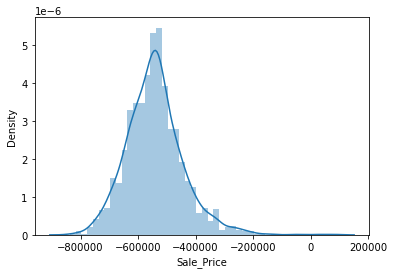

In [192]:
sns.distplot(data1_y-lasso_p)

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [194]:
from sklearn.linear_model import Ridge
r_d=Ridge()

In [195]:
r_d.fit(data1_x,data1_y)

Ridge()

In [196]:
r_d_test=r_d.predict(test_2)
r_d_test

array([699468.09561446, 721424.75657658, 731816.00566747, ...,
       727738.49234622, 695357.07153944, 783929.58536174])

In [197]:
r_d.intercept_

702431.1833456281

In [198]:
r_d.coef_

array([-5.57890462e+01, -9.60367165e+02, -8.57898752e+00,  1.48495405e+00,
        2.15017985e+04, -2.27013557e+02,  6.29600831e+02, -1.53969333e+04,
       -1.41652574e+02,  3.67284687e+03,  2.41593480e+02, -1.77962114e+03,
       -8.20906608e+03, -1.29565692e+03, -5.43689908e+02,  9.40679466e+03,
        6.11956137e+03,  2.34779308e+02,  5.74536915e+01,  1.15952764e+03,
        7.00846626e+03, -8.36682160e+02,  3.68226773e+02,  4.92525656e+03,
        2.65422152e+01, -9.10641682e+03,  6.36763999e+02,  1.99122536e+03,
       -8.68324127e+03,  2.02127186e+03, -2.59176185e+03,  8.80908876e+01,
       -1.25979579e+02, -1.22425946e+03, -1.42015830e+02, -1.46802282e+02,
        1.75951459e+02, -7.21767606e+02, -6.85071921e+02, -1.74908630e+02,
       -4.73887681e+02,  2.38391596e+01,  3.38810158e+01, -2.02513875e+01,
        2.47125762e+01,  8.12358029e+02, -1.82958331e+03, -3.07508470e+02,
        1.06586520e+02, -5.78105280e+03, -1.80666478e+04, -6.87242675e+03,
        2.17353031e+03,  

In [199]:
r_R_2=r_d.score(data1_x,data1_y)
r_R_2

0.8829955117871608

In [200]:
r_AdjR_2=1-(((1-r_R_2)*(1459-1))/(1459-73-1))
r_AdjR_2

0.8768284882207079

In [201]:
# MAE - mean absolute error
r_test_mae=metrics.mean_absolute_error(data1_y,r_d_test)
r_test_mae

565147.0803728784

In [202]:
# MSE
r_test_mse=metrics.mean_squared_error(data1_y,r_d_test) 
r_test_mse

329249329475.6822

<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

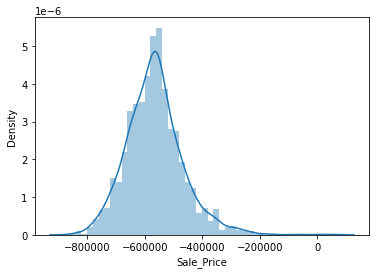

In [203]:
sns.distplot(data1_y-r_d_test)

In [204]:
l_1=["linear","lasso","ridge"]
l_2=[R_2,l_R_2 ,r_R_2]
l_3=[AdjR_2,l_AdjR_2 , r_AdjR_2]
l_4=[test_mse,l_test_mse,r_test_mse]

In [205]:
final = pd.DataFrame({'modelname':l_1,"R-Square":l_2,"Adj_R-Square":l_3,"MSE":l_4})
final

modelname  R-Square  Adj_R-Square           MSE
0    linear  0.883035      0.876870  3.039975e+11
1     lasso  0.883034      0.876869  3.035833e+11
2     ridge  0.882996      0.876828  3.292493e+11